In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations
import pandas as pd
import xarray as xr
import datetime as dt
import os 
import glob 
import cmocean 
import pickle
import gsw

%matplotlib inline

1.1363636363636362

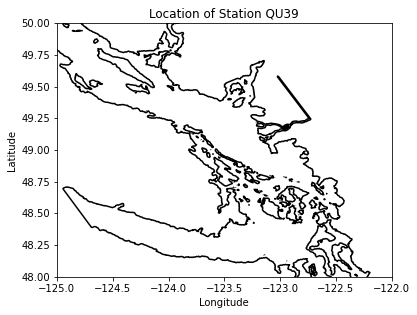

In [2]:
loc='QU39'

# lat and lon informatin for place:
lon,lat=places.PLACES[loc]['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES[loc]['NEMO grid ji']
# GEM2.5 grid ji is atm forcing grid for ops files
jw,iw=places.PLACES[loc]['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,50)
ax.set_xlim(-125,-122)
ax.set_title('Location of Station QU39')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

#### Vertical Eddy Diffusivity Profiles for the first of each month (Jan, Feb, Mar)

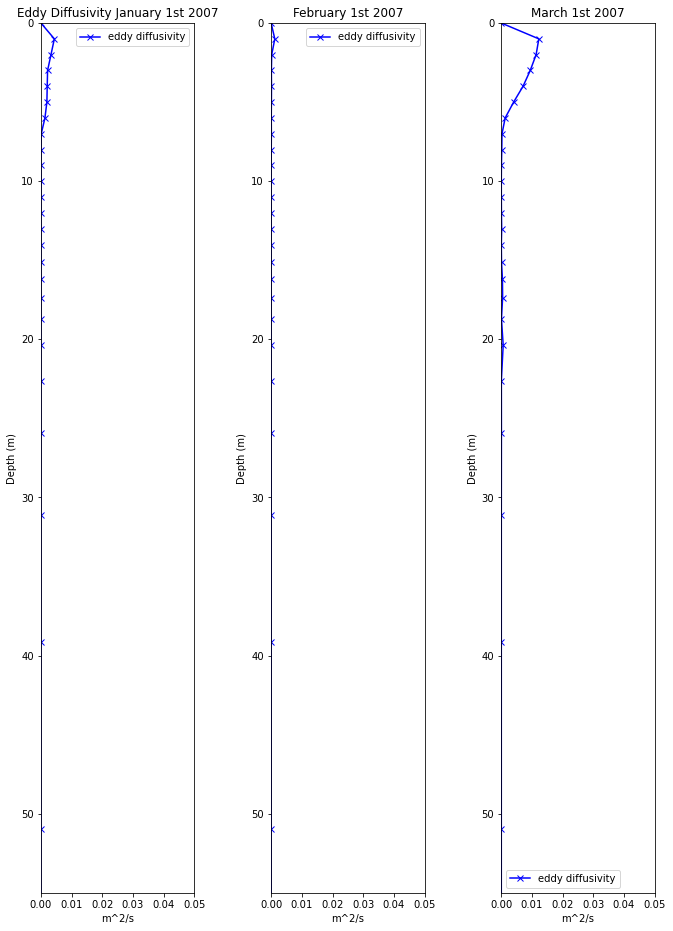

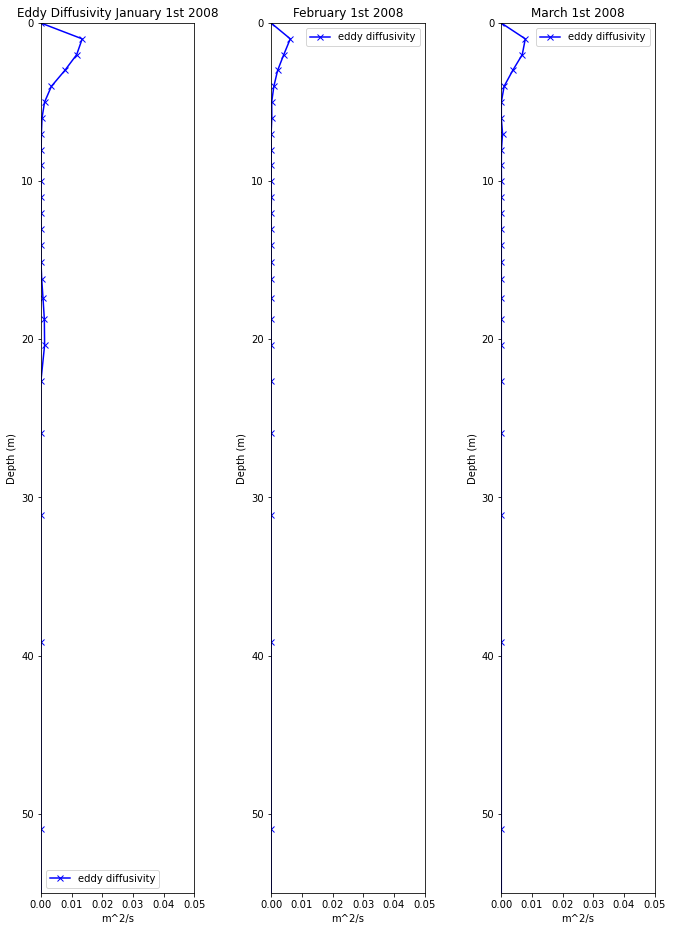

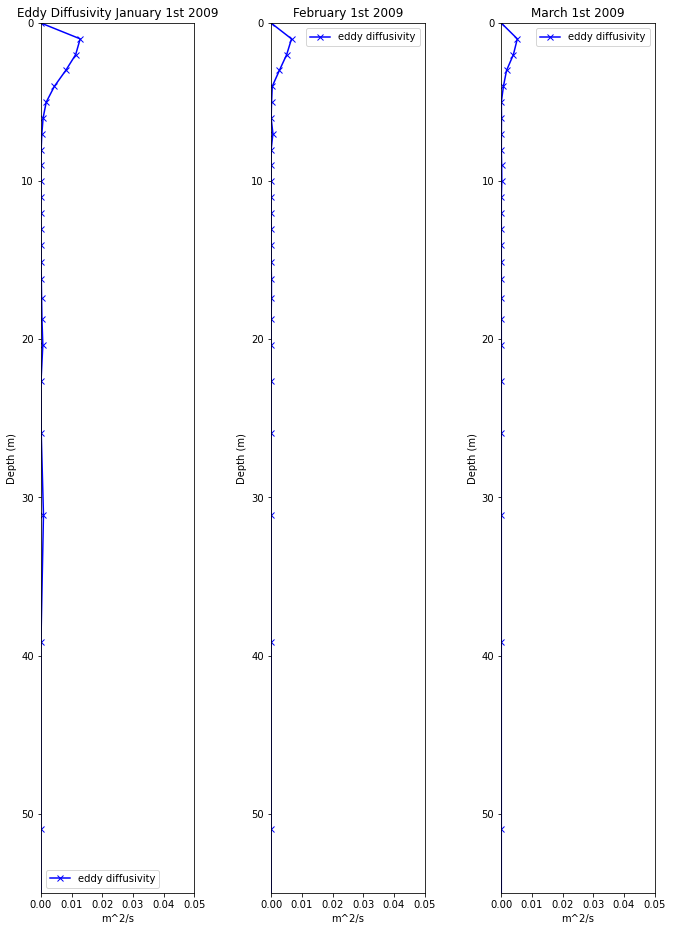

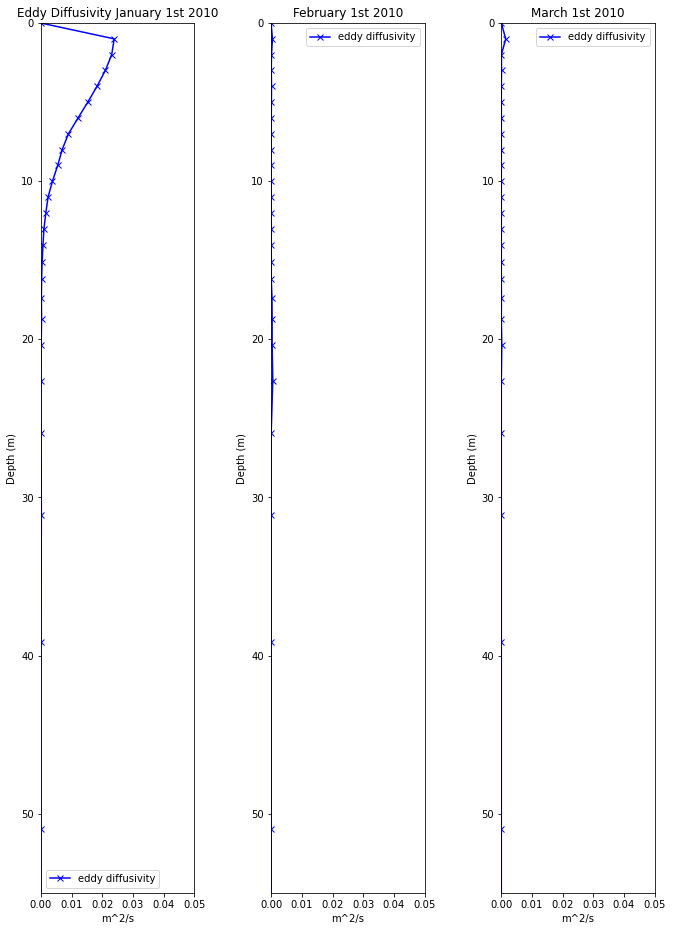

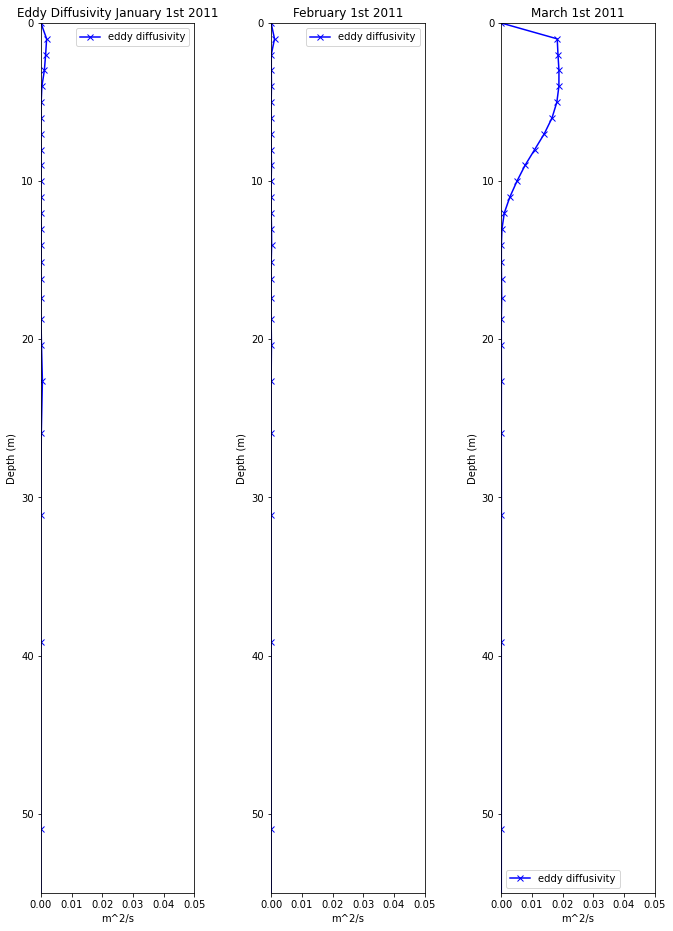

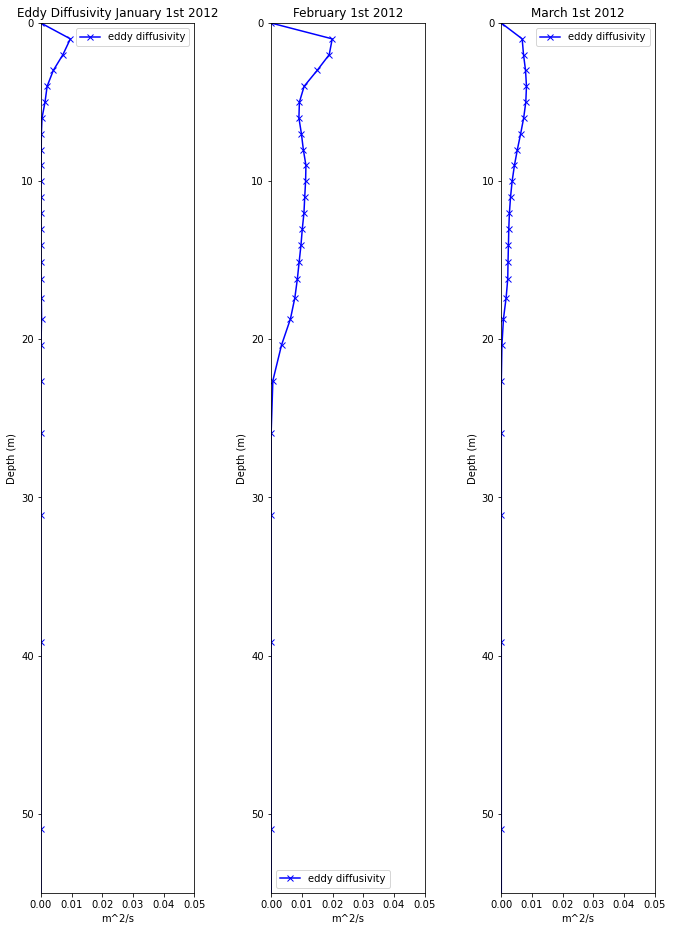

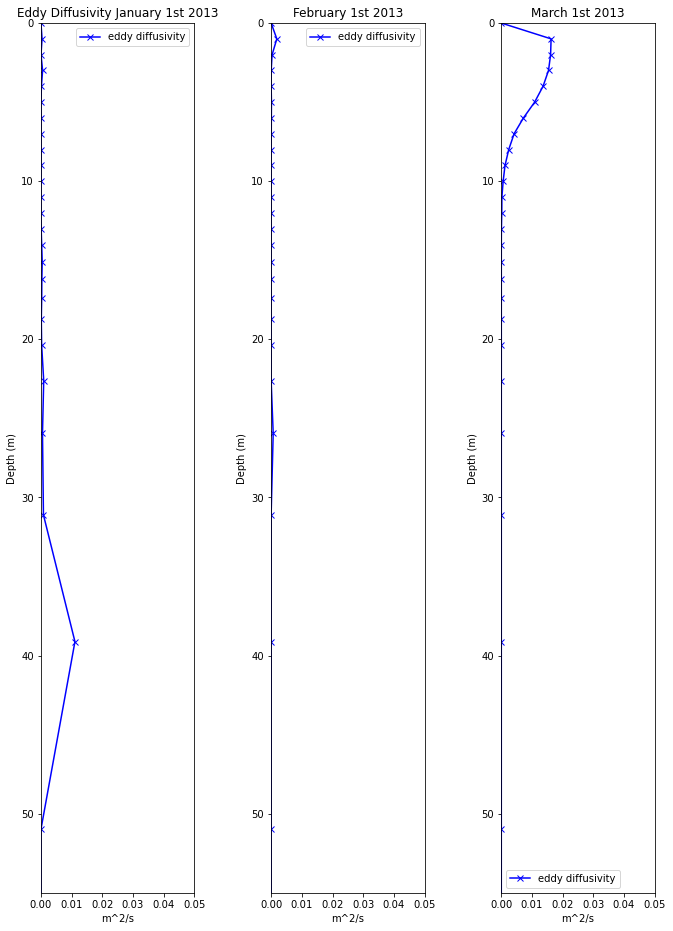

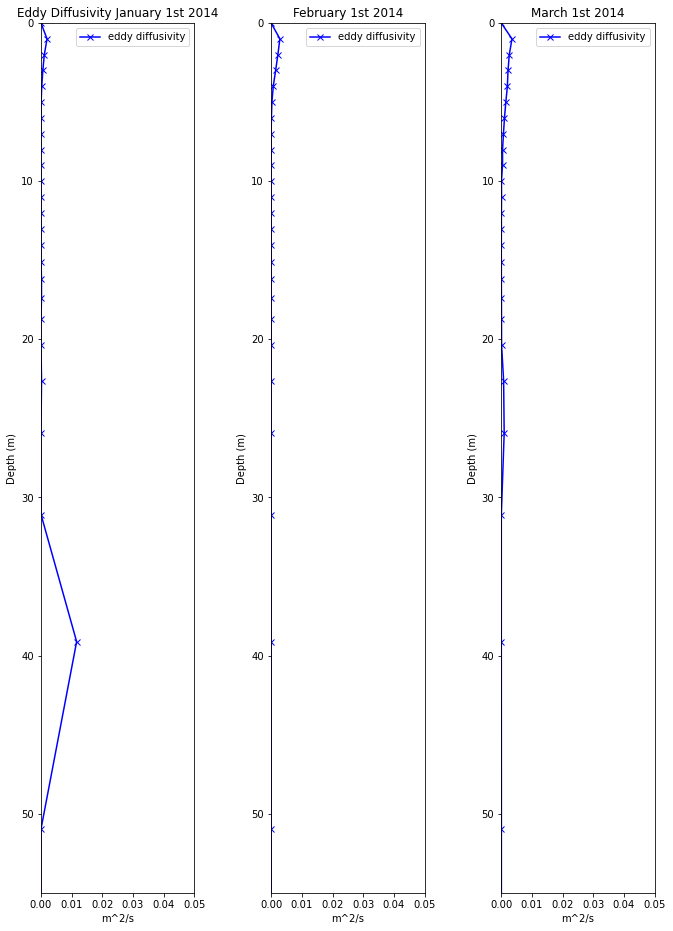

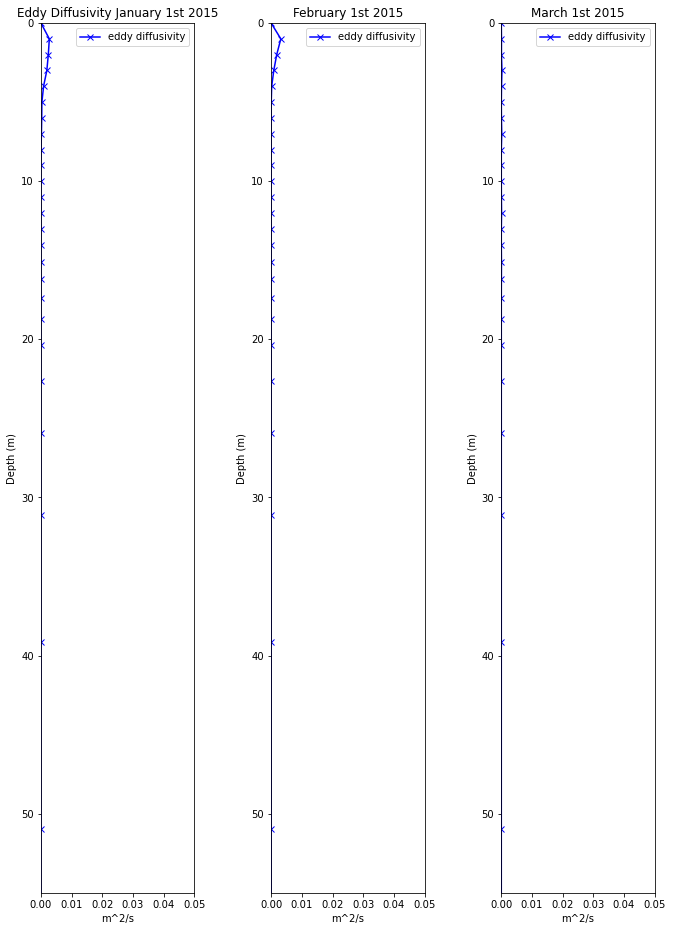

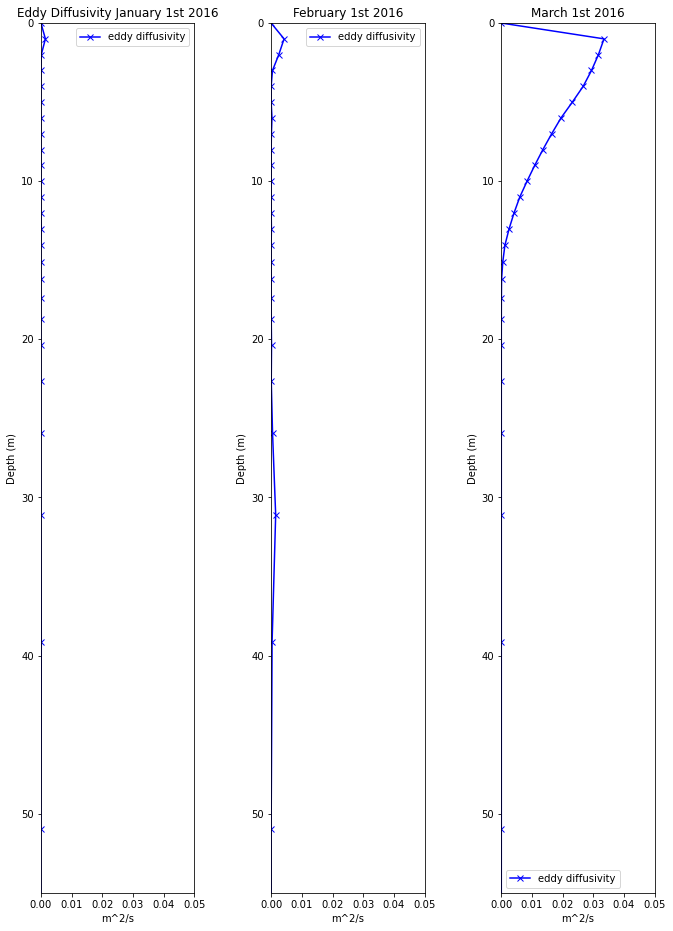

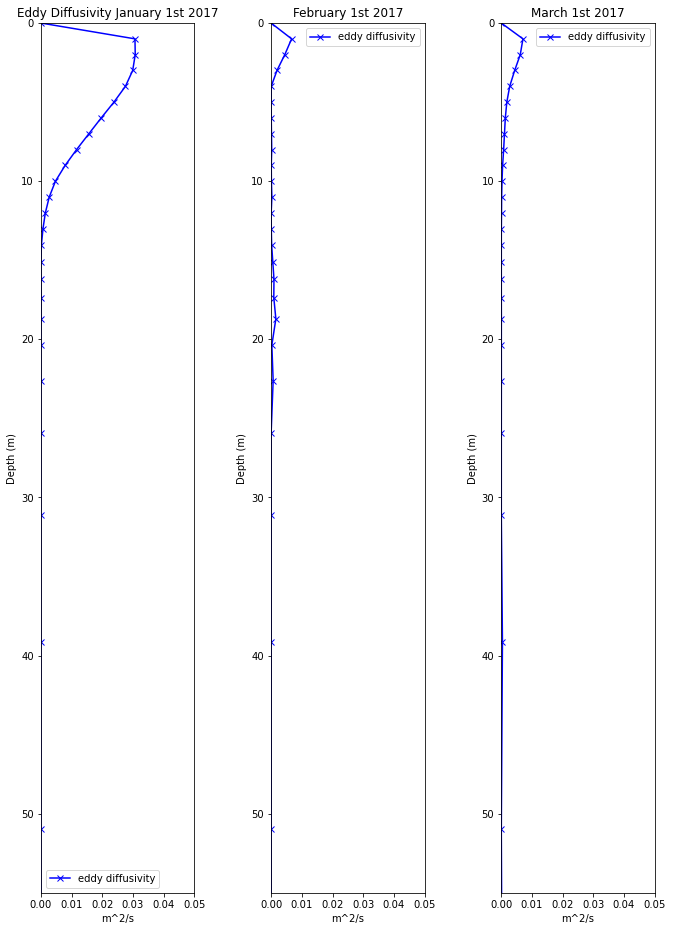

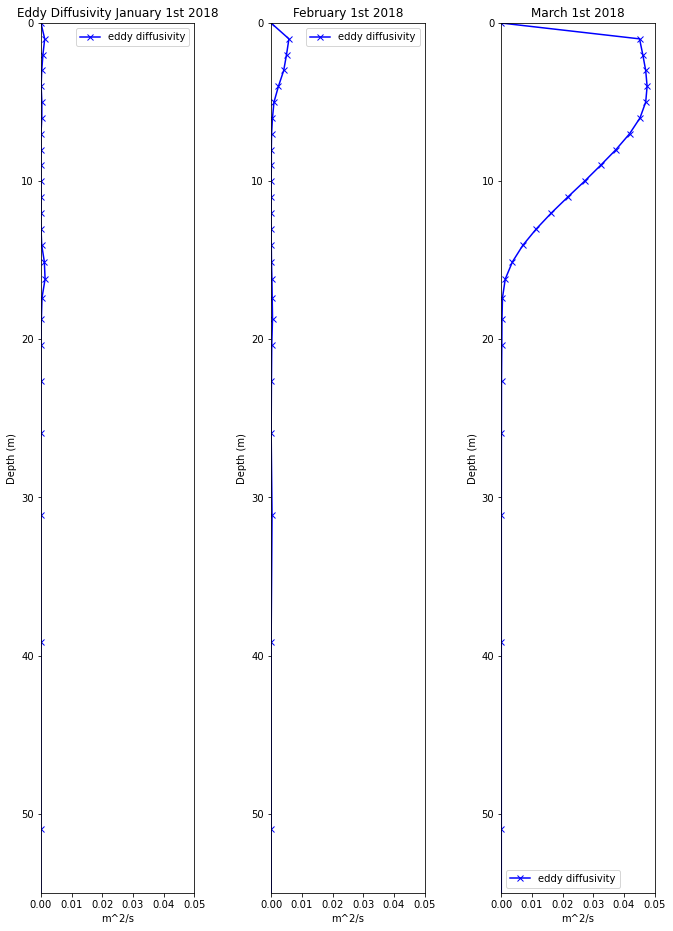

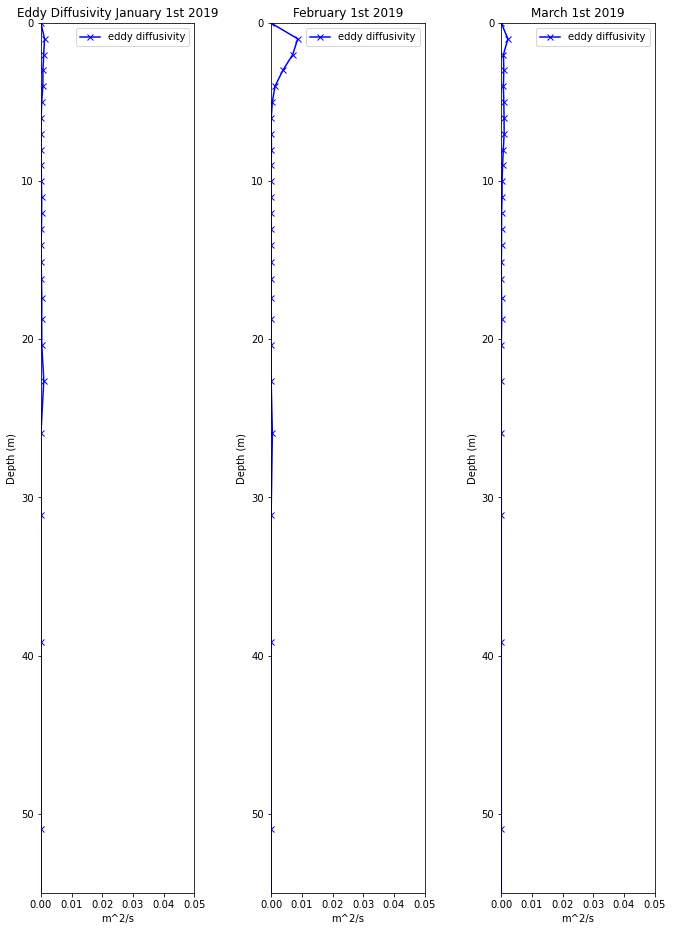

In [10]:
for iyear in range(2007,2020):
    dateslist=[[dt.datetime(iyear,1,1),dt.datetime(iyear,1,2)],
           [dt.datetime(iyear,2,1),dt.datetime(iyear,2,2)], # don't forget leap years: 2020,2016,2012,2008
           [dt.datetime(iyear,3,1),dt.datetime(iyear,3,2)]]
    eddy_S3=list()
    for ind, datepair in enumerate(dateslist):
        start=datepair[0]
        end=datepair[1] 
        basedir='/results2/SalishSea/nowcast-green.201905/'
        nam_fmt='nowcast'
        flen=1 # files contain 1 day of data each
        ftype= 'grid_W' # load bio files
        tres=1 # 1: hourly resolution; 24: daily resolution 
        flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)

        with xr.open_mfdataset(flist['paths']) as grid:
            eddy=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)
            alldepth=np.array(grid.depthw)
            
        #get the land mask
        col_mask = tmask[0,:,ij,ii] 
        #get the depths of the watercolumn and filter only cells that have water
        depth_S3 = alldepth[col_mask==1]
        # do the same for eddy
        eddy_S3.append(eddy[col_mask==1])
        
    fig,ax=plt.subplots(1,3,figsize=(11,16))  # creates a figure "ax" with 2 plots, with the same y axis
    fig.subplots_adjust(wspace=.5)
    ax[0].plot(eddy_S3[0],depth_S3,'b-x',label='eddy diffusivity')
    ax[0].set_ylim(0,55)
    ax[0].set_xlim(0,0.05)
    ax[0].invert_yaxis()
    ax[0].legend()
    ax[0].set_xlabel('m^2/s')
    ax[0].set_title('Eddy Diffusivity January 1st %i' %iyear)
    ax[0].set_ylabel('Depth (m)')

    ax[1].plot(eddy_S3[1],depth_S3,'b-x',label='eddy diffusivity')
    ax[1].set_ylim(0,55)
    ax[1].set_xlim(0,0.05)
    ax[1].invert_yaxis()
    ax[1].legend()
    ax[1].set_xlabel('m^2/s')
    ax[1].set_title('February 1st %i' %iyear)
    ax[1].set_ylabel('Depth (m)')

    ax[2].plot(eddy_S3[2],depth_S3,'b-x',label='eddy diffusivity')
    ax[2].set_ylim(0,55)
    ax[2].set_xlim(0,0.05)
    ax[2].invert_yaxis()
    ax[2].legend()
    ax[2].set_xlabel('m^2/s')
    ax[2].set_title('March 1st %i' %iyear)
    ax[2].set_ylabel('Depth (m)')
        


#### Vertical Eddy Diffusivity Profiles for a windy day and calm day

Text(0.5, 1.0, 'calm day')

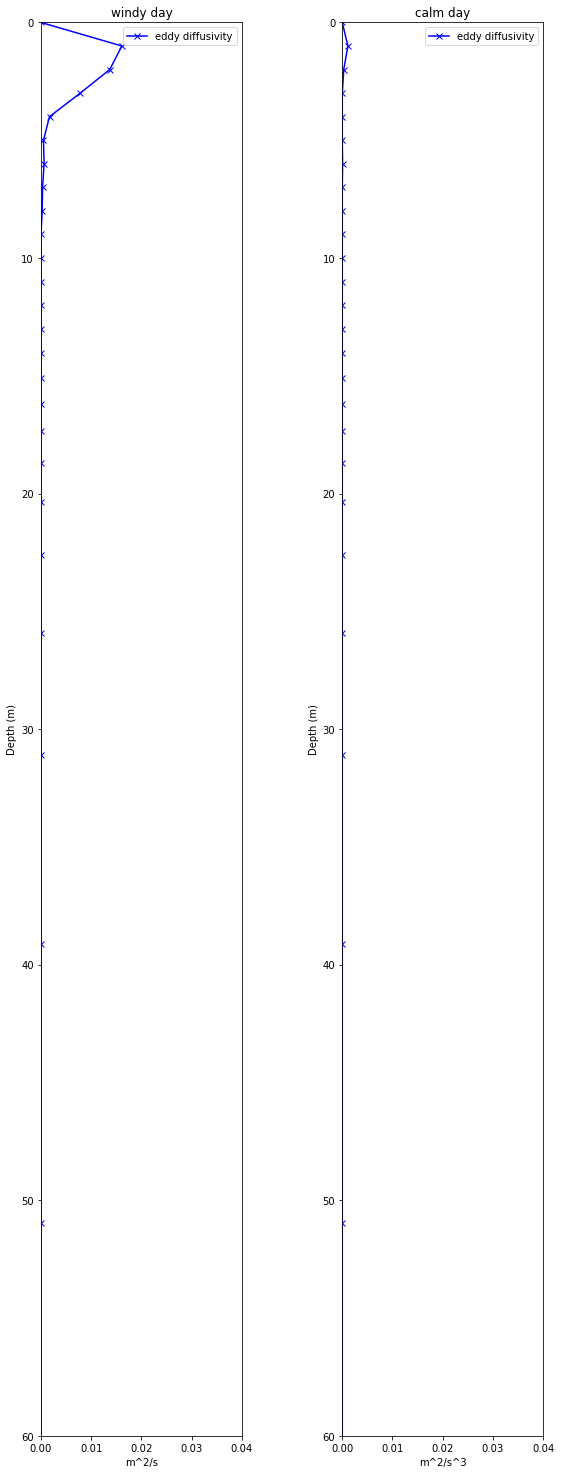

In [3]:
# A very windy day
start=dt.datetime(2018,5,29)
end=dt.datetime(2018,5,30) 
start2=dt.datetime(2018,5,2)
end2=dt.datetime(2018,5,3)
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_W' # load bio files
tres=1 # 1: hourly resolution; 24: daily resolution 
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
flist2=et.index_model_files(start2,end2,basedir,nam_fmt,flen,ftype,tres)

with xr.open_mfdataset(flist['paths']) as grid:
    windy=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)
    #diss=np.array(grid.dissipation.isel(y=ij,x=ii))
    depth=np.array(grid.depthw)

with xr.open_mfdataset(flist2['paths']) as grid:
    calm=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)

fig,ax=plt.subplots(1,2,figsize=(9,26))  # creates a figure "ax" with 2 plots, with the same y axis
fig.subplots_adjust(wspace=.5)
ax[0].plot(windy,depth,'b-x',label='eddy diffusivity')
ax[0].set_ylim(0,60)
ax[0].set_xlim(0,0.04)
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_xlabel('m^2/s')
ax[0].set_title('windy day')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(calm,depth,'b-x',label='eddy diffusivity')
ax[1].set_ylim(0,60)
ax[1].set_xlim(0,0.04)
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_xlabel('m^2/s^3')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('calm day')

#### Choosing a threshold value for turbocline depth:

In [4]:
# Based on "windy day" profile above
eddy_S3=list()
start=dt.datetime(2018,5,29)
end=dt.datetime(2018,5,30)
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_W' # load bio files
tres=1 # 1: hourly resolution; 24: daily resolution 
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
flist2=et.index_model_files(start,end,basedir,nam_fmt,flen,"grid_T",tres)

with xr.open_mfdataset(flist2['paths']) as gridt:
    depth_T=np.array(gridt.deptht)

with xr.open_mfdataset(flist['paths']) as grid:
    eddytest=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)
    alldepth=np.array(grid.depthw)

#get the land mask
col_mask = tmask[0,:,ij,ii] 
#get the depths of the watercolumn and filter only cells that have water
depth_S3 = depth_T[col_mask==1]
# do the same for eddy
eddy_S3.append(eddytest[col_mask==1])
eddy_S3=(np.array(eddy_S3)).flatten()
df=pd.DataFrame({'depth':depth_S3,'eddy':eddy_S3})
df

# looks like a value of 0.001 would be good


,depth,eddy
0,0.500000,0.000000
1,1.500003,0.016109
2,2.500011,0.013697
3,3.500031,0.007816
4,4.500071,0.001705
5,5.500151,0.000503
6,6.500310,0.000625
7,7.500623,0.000327
8,8.501236,0.000240
9,9.502433,0.000002


#### Confirming that turbocline function works:

In [5]:
def turbo(eddy,depth):
    turbo=list()
    dfed=pd.DataFrame({'depth':depth[:-1], 'eddy':eddy[1:]}) #do depth T instead of W, depth[:-1], then day[1:]
    dfed=dfed.iloc[1:] # dropping surface values
    dfed[:21] #keep top 21 (25m depth)
    for i, row in dfed.iterrows():
        try:
            if row['eddy']<0.001:
                turbo.append(dfed.at[i,'depth'])
                break
        except IndexError:
            turbo.append(np.nan)
            print('turbocline depth not found')
    return turbo

turbotest=turbo(eddytest,depth_T)
print(f'Turbcoline depth march 3, 2018: {turbotest}')

Turbcoline depth march 3, 2018: [4.5000706]


### Series of Salinity, Density & Eddy Diffusivity Profiles
Daily average for each day of March 2018

In [6]:
# loading variables: 
year=2018
modver='201905'
savedir='/ocean/aisabell/MEOPAR/extracted_files'
fname4=f'JanToMarch_Mixing_{year}_{loc}_{modver}.pkl'
savepath4=os.path.join(savedir,fname4)
halocline,eddy,depth,grid_time,temp,salinity=pickle.load(open(savepath4,'rb'))

In [7]:
# calculate daily density
marchdays=grid_time[59:60]
p=0
for ind,time in enumerate(marchdays):
    dailyeddy=eddy[ind] 
    dailysal=salinity[ind]     
    dailytemp=temp[ind]  
    dailydensity=gsw.rho(dailysal,dailytemp,p)
    
print(dailyeddy)


[0.0000000e+00 1.2221131e-03 6.4304384e-04 2.5822120e-04 6.3659158e-05
 2.9565391e-04 2.8196277e-04 8.5862339e-06 9.8541414e-06 1.5338369e-06
 1.1512972e-06 8.0762293e-05 2.9833265e-05 2.3400642e-05 2.5307047e-04
 1.1057814e-03 1.3467377e-03 3.5125061e-04 1.3293102e-04 1.2079964e-05
 1.5692029e-05 2.1615476e-06 2.9348121e-06 1.7577995e-05 1.1839853e-06
 1.3401242e-06 1.4467720e-06 1.5320187e-06 1.7296267e-06 1.8418963e-06
 2.2602703e-06 2.3301077e-06 2.3898733e-04 6.5373667e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


<ipython-input-7-c2daeb3dc0db>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,3,figsize=(14,16))  # creates a figure "ax" with 2 plots, with the same y axis


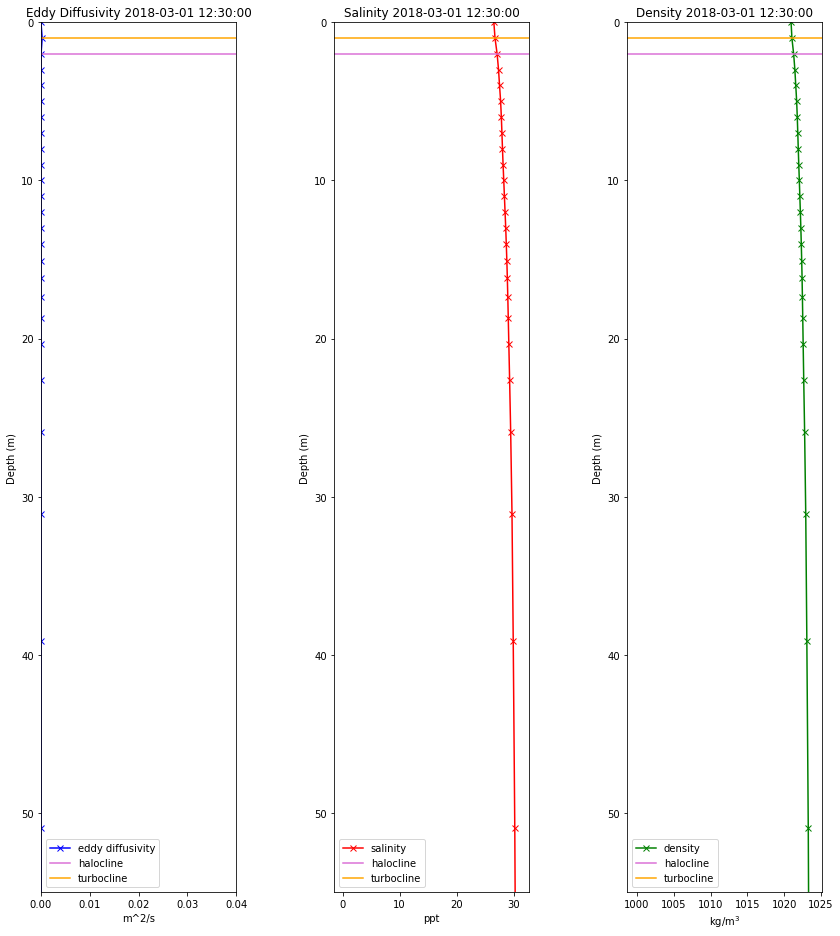

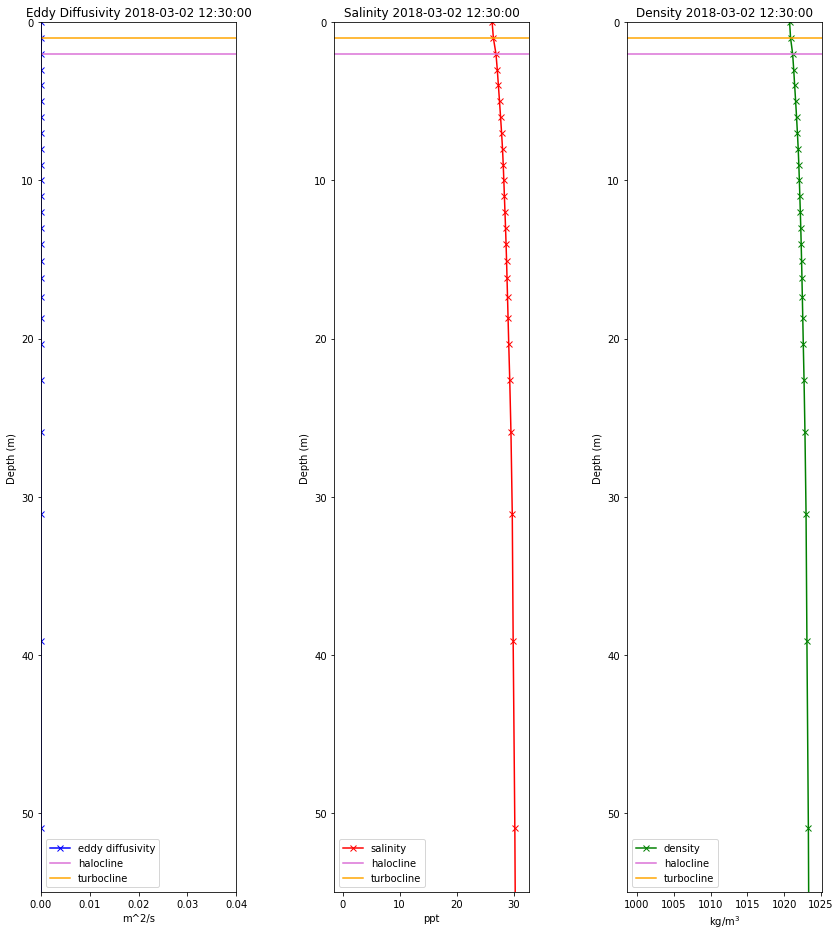

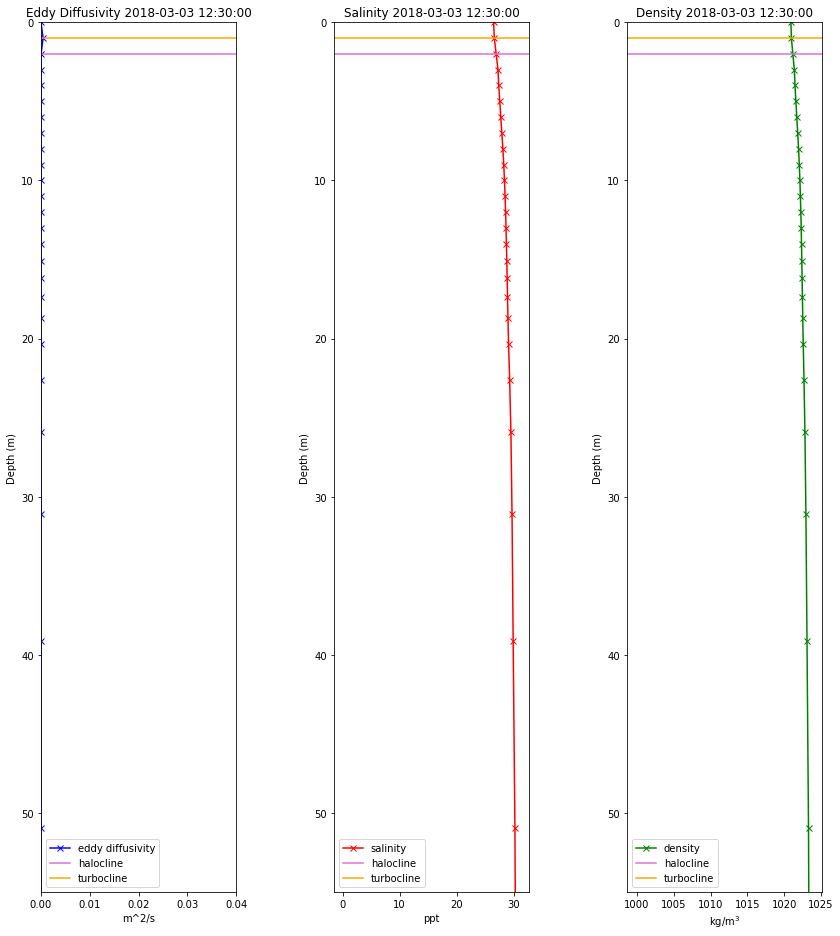

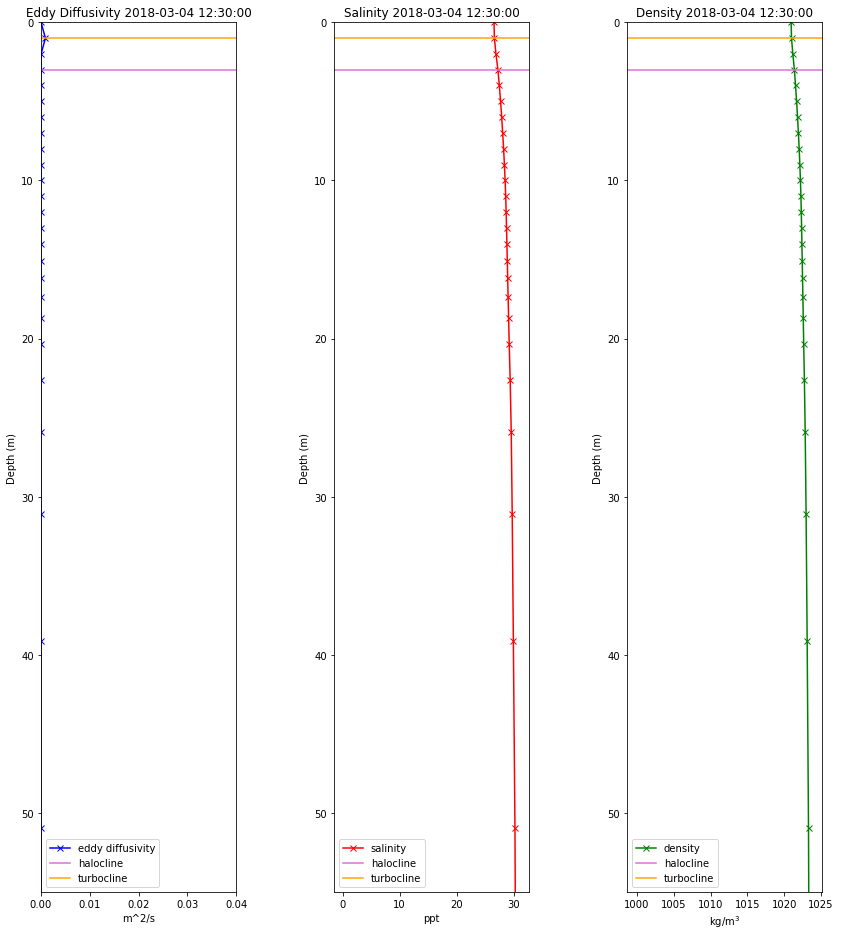

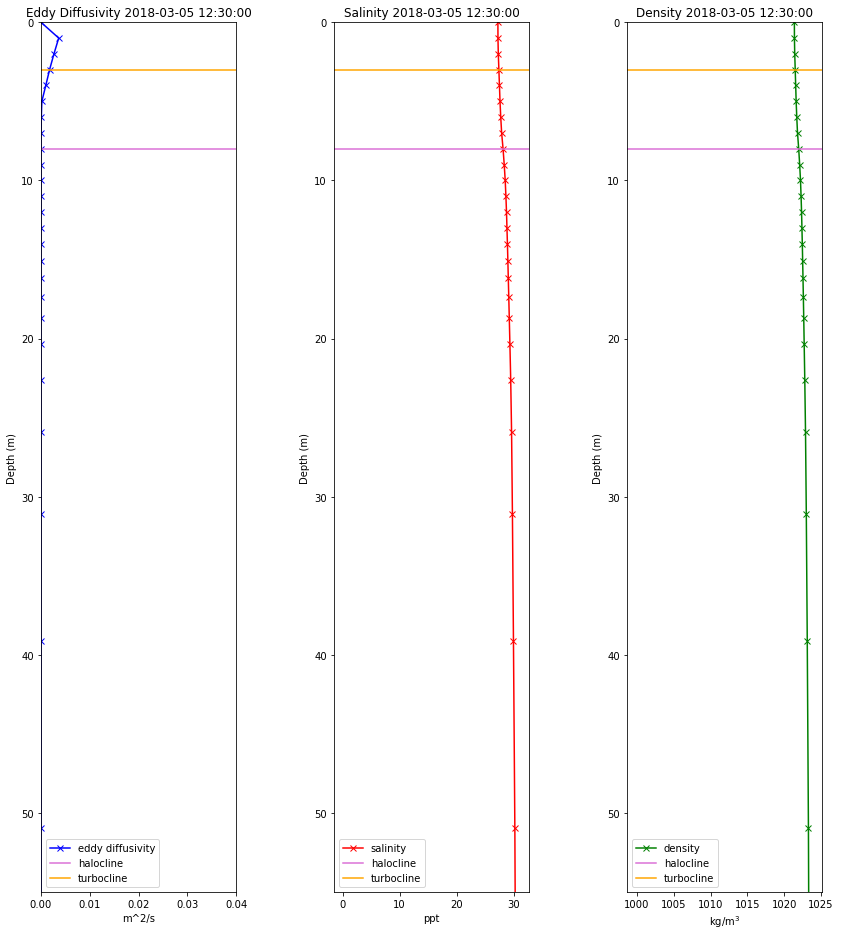

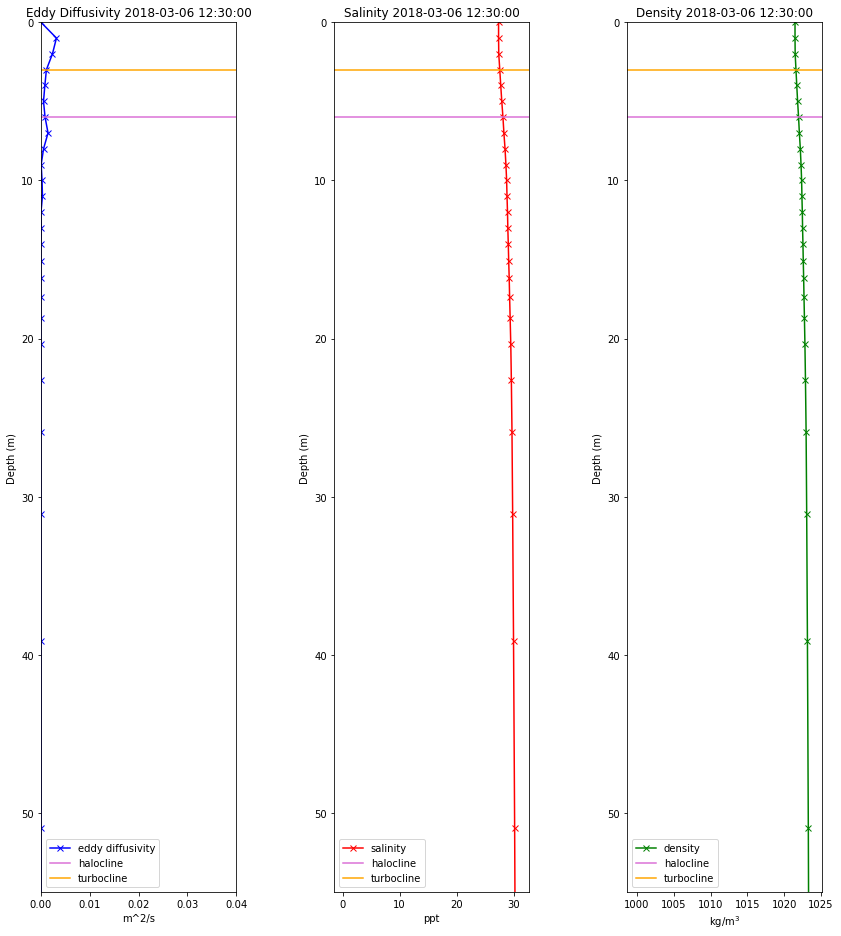

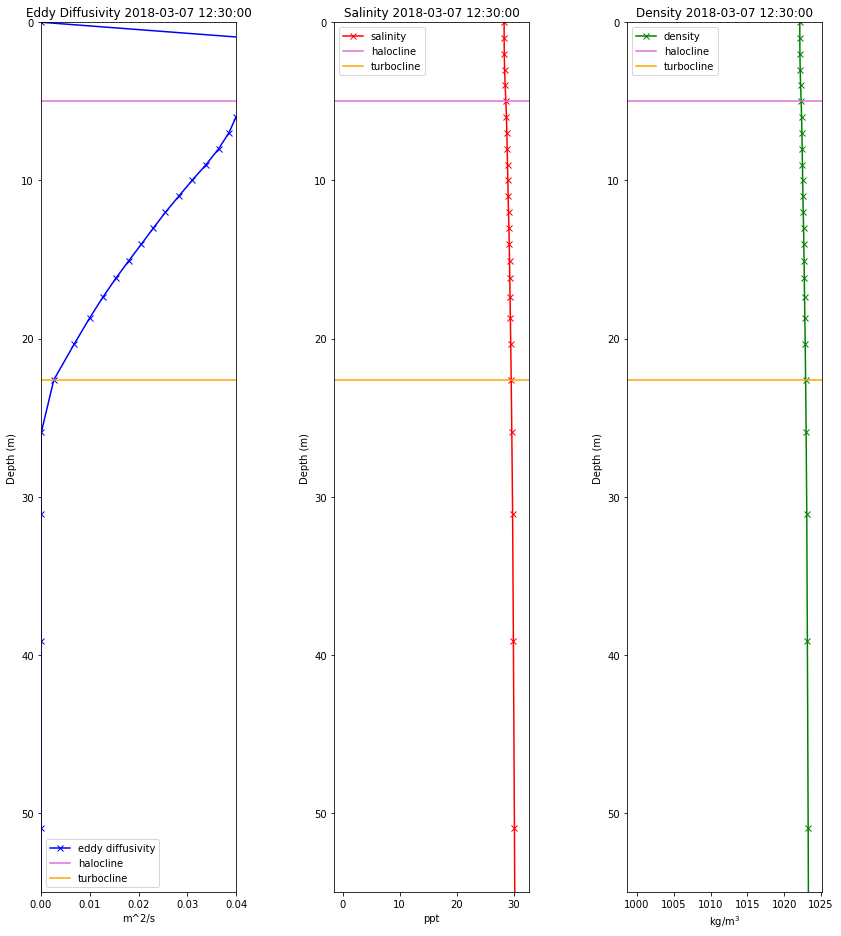

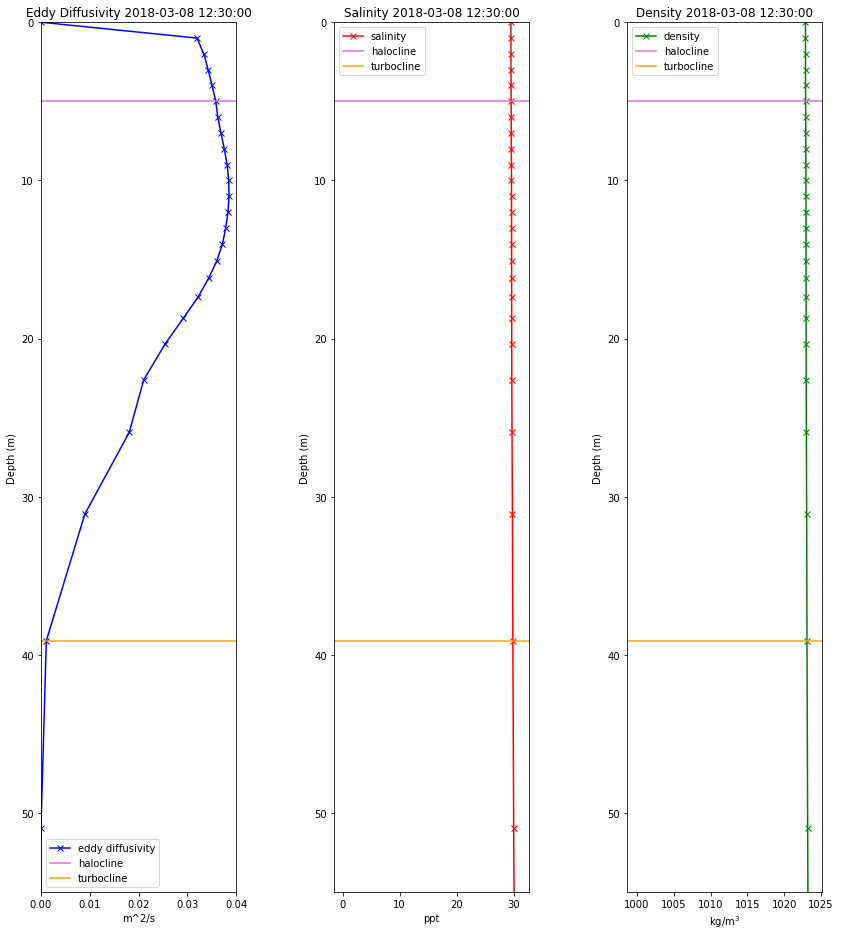

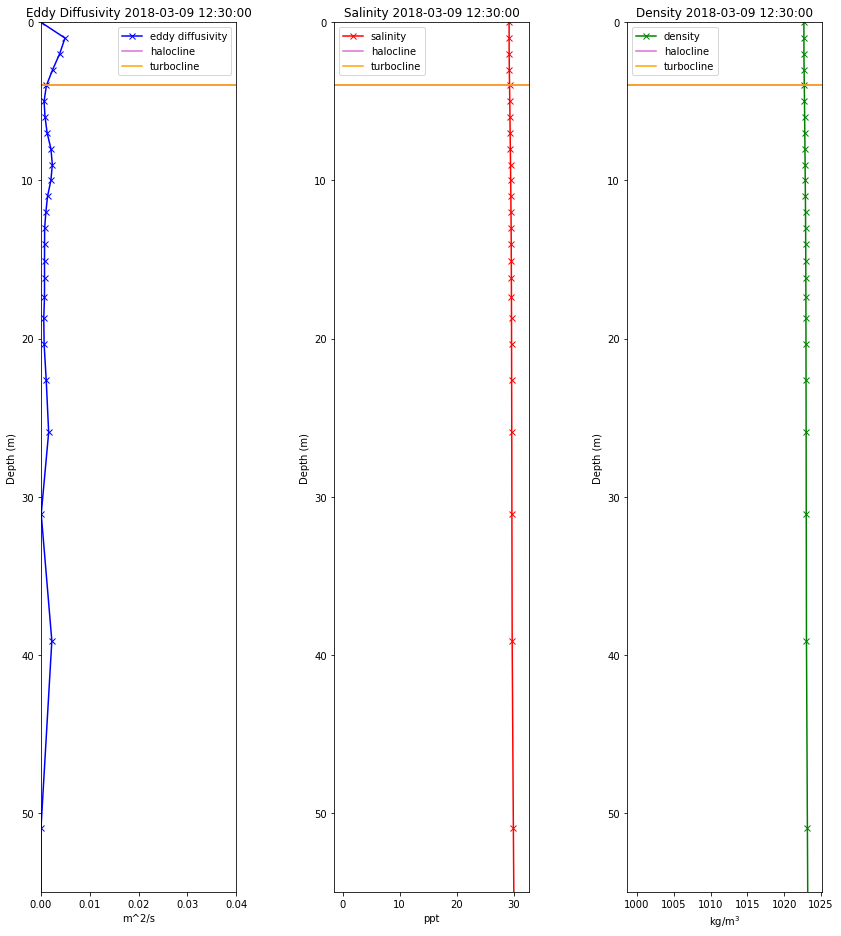

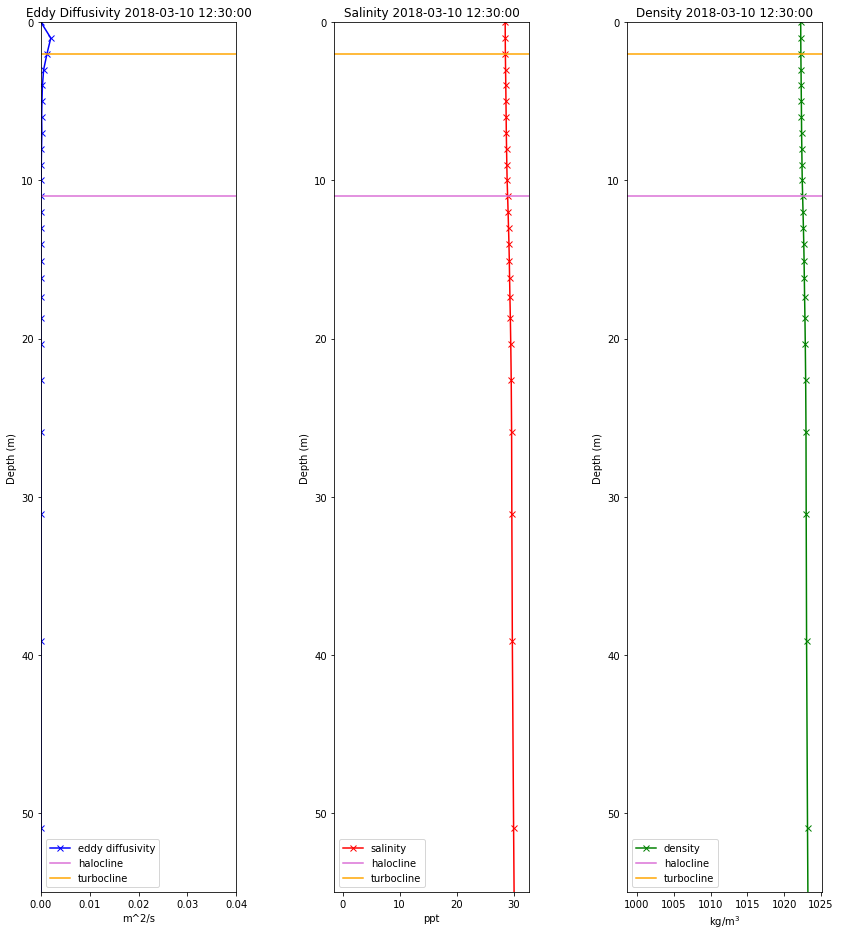

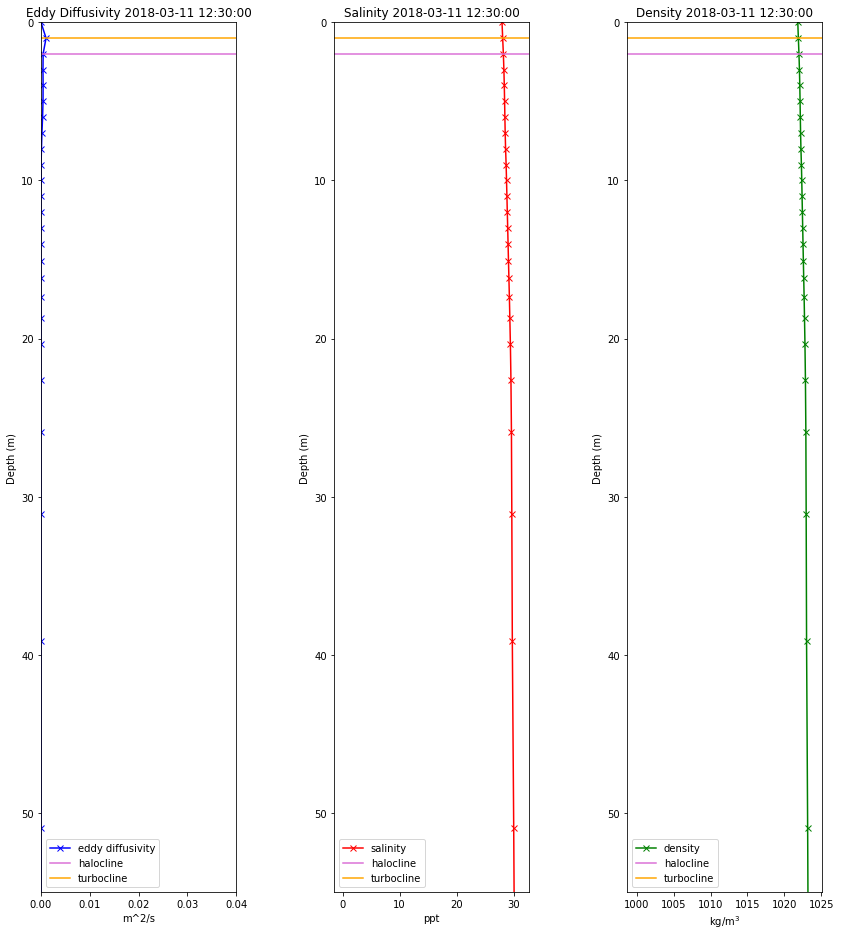

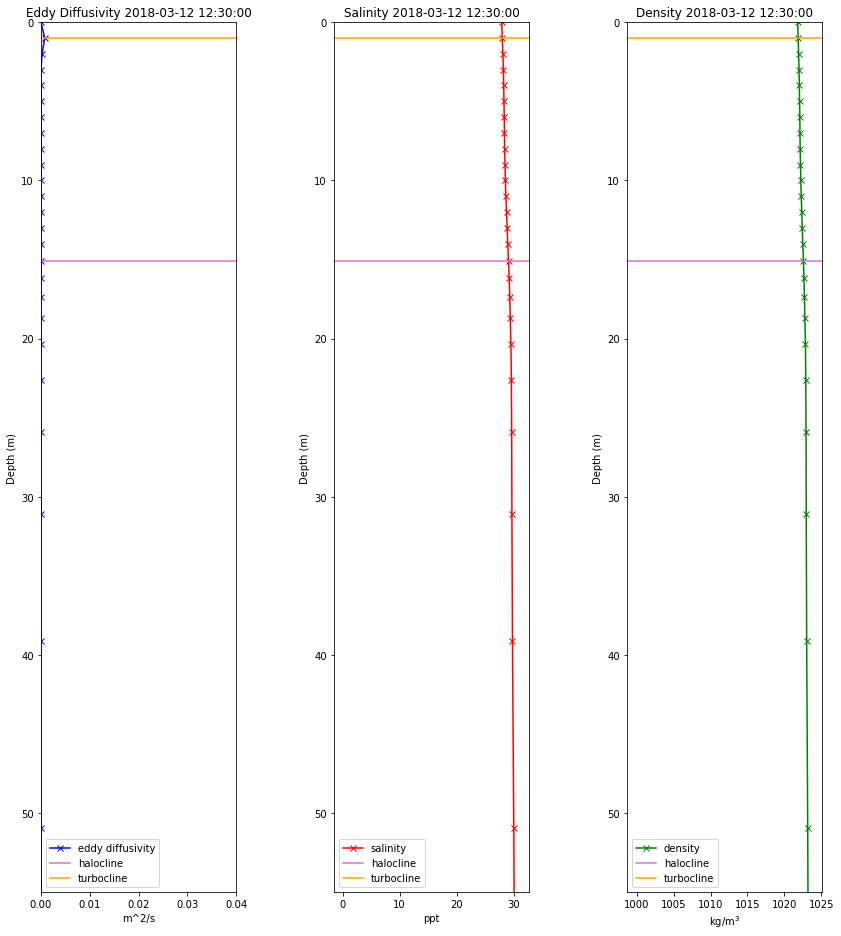

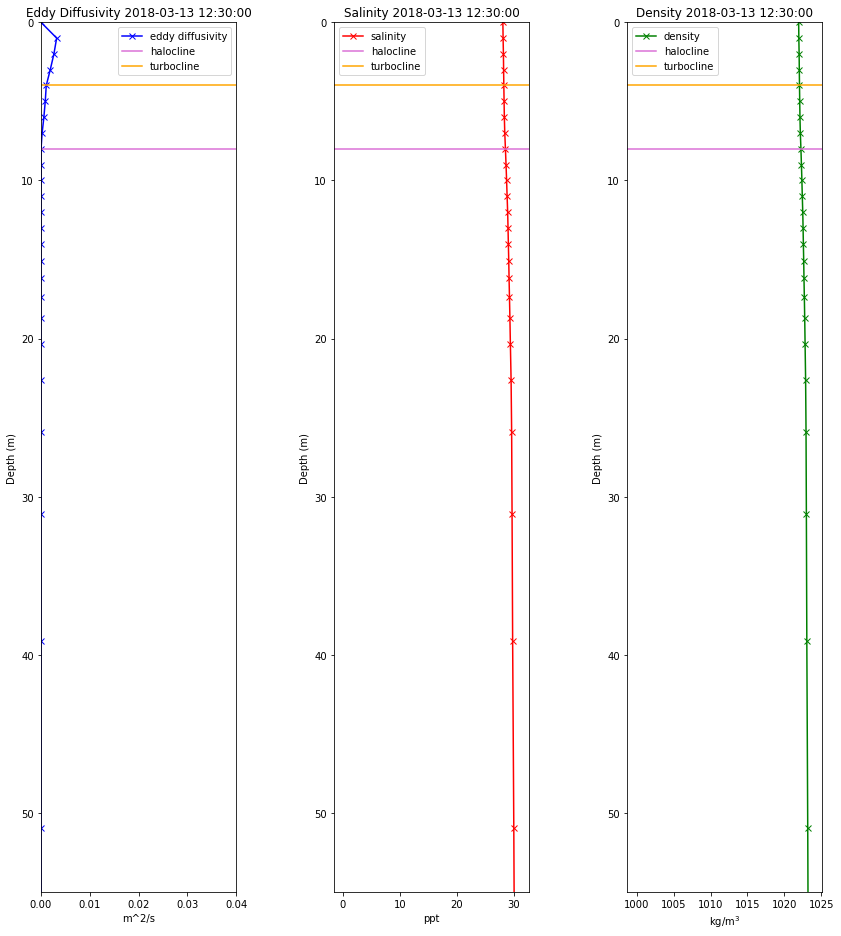

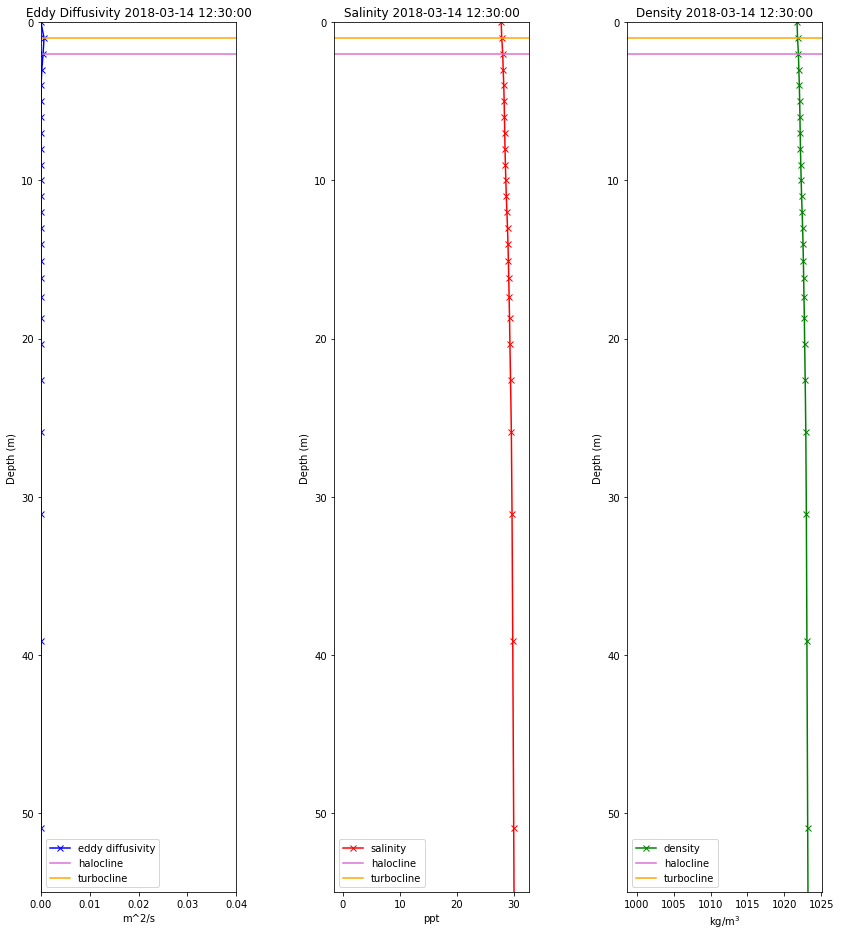

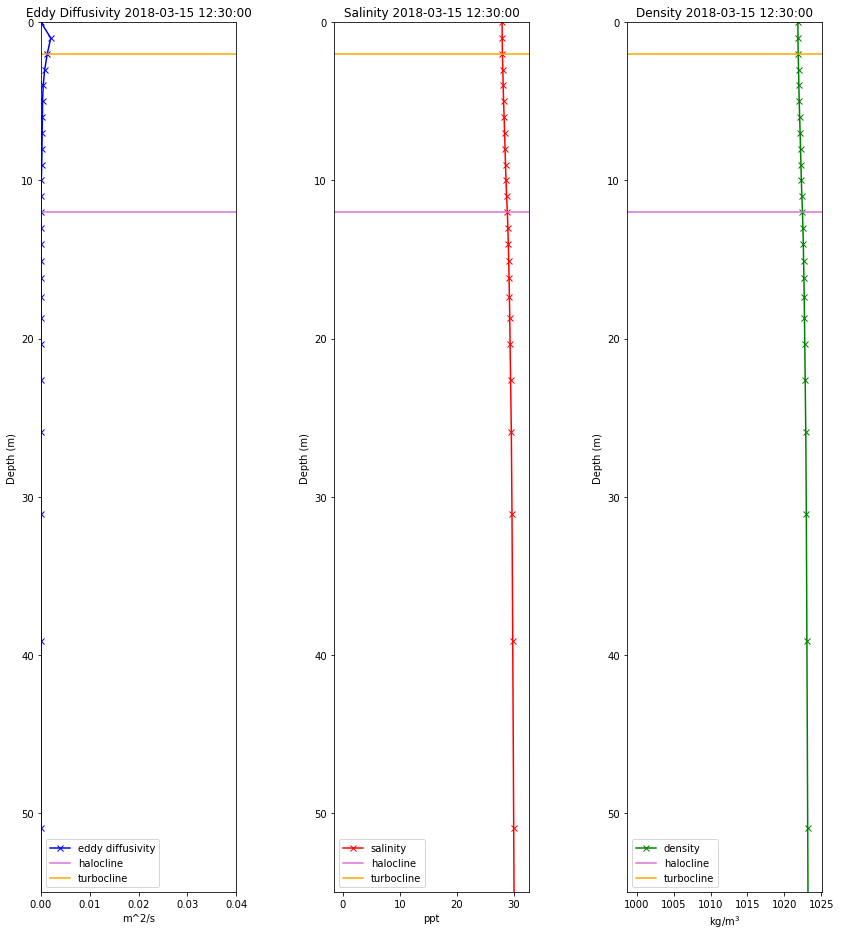

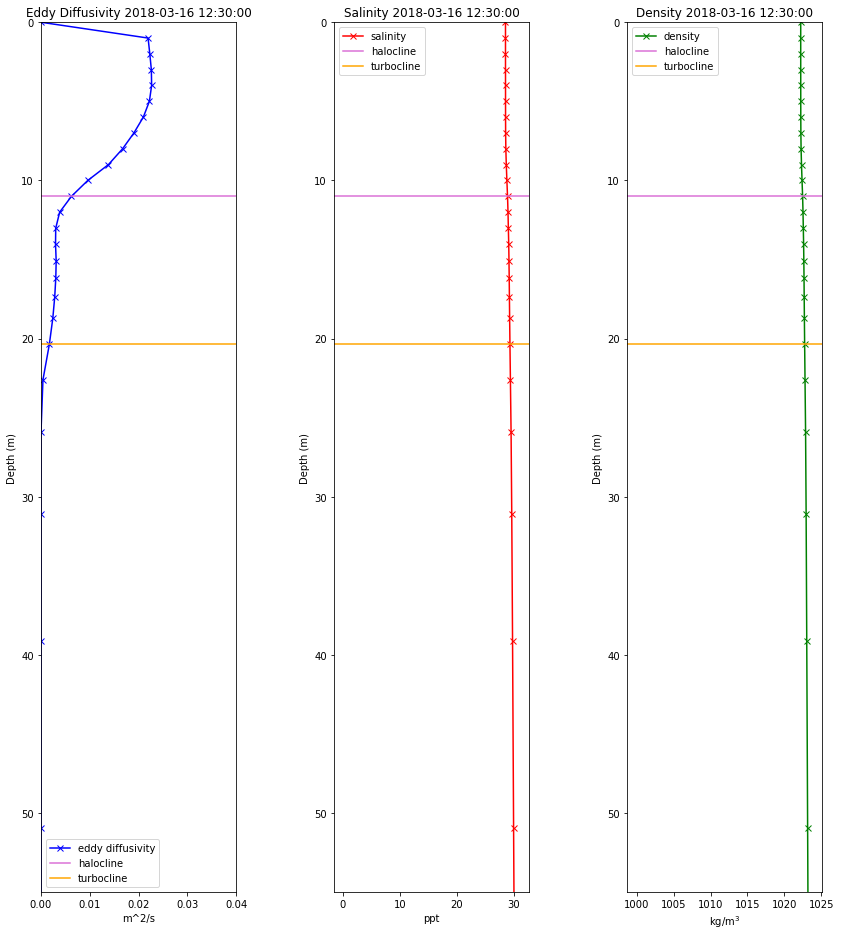

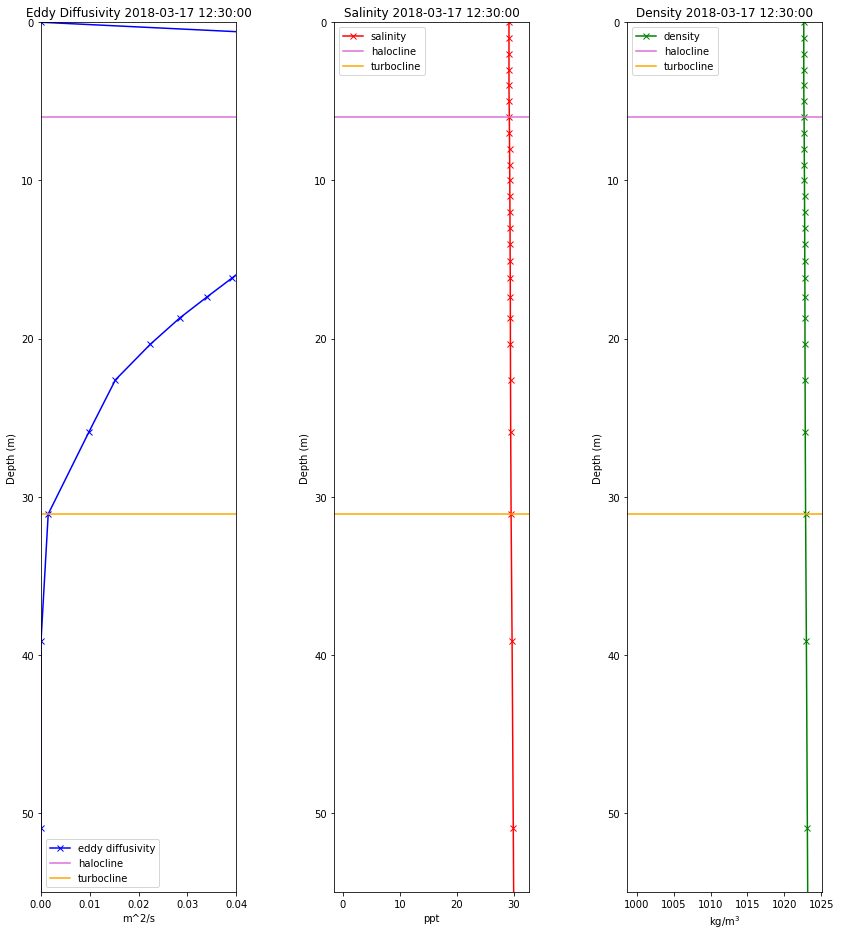

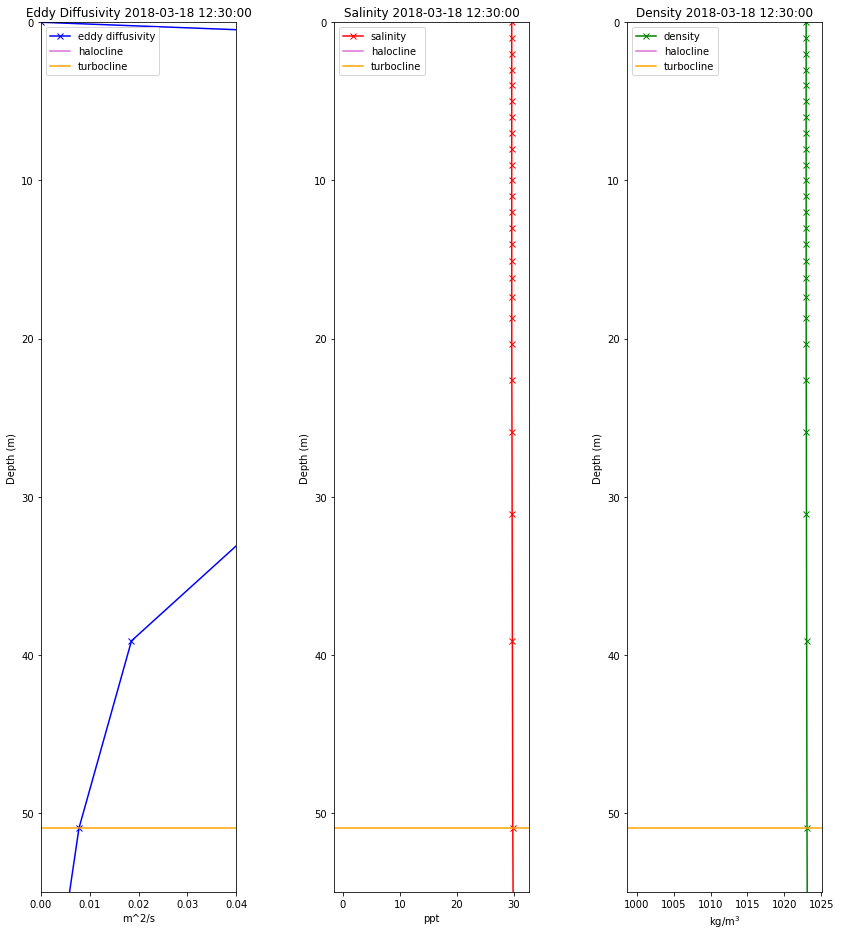

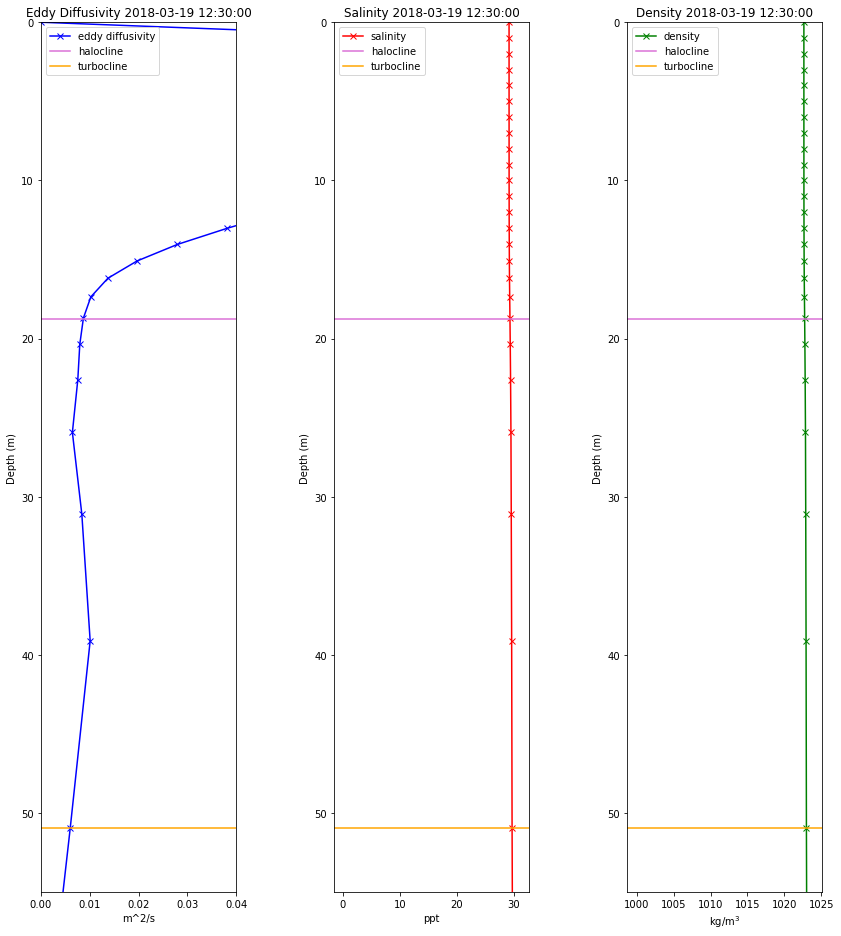

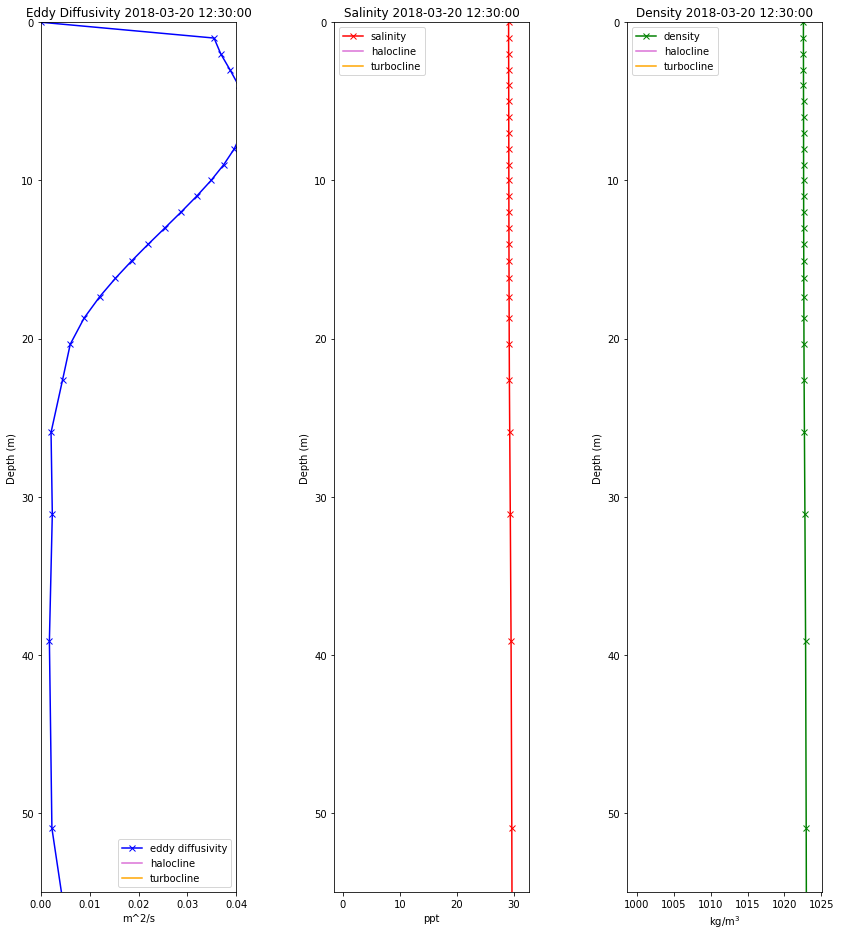

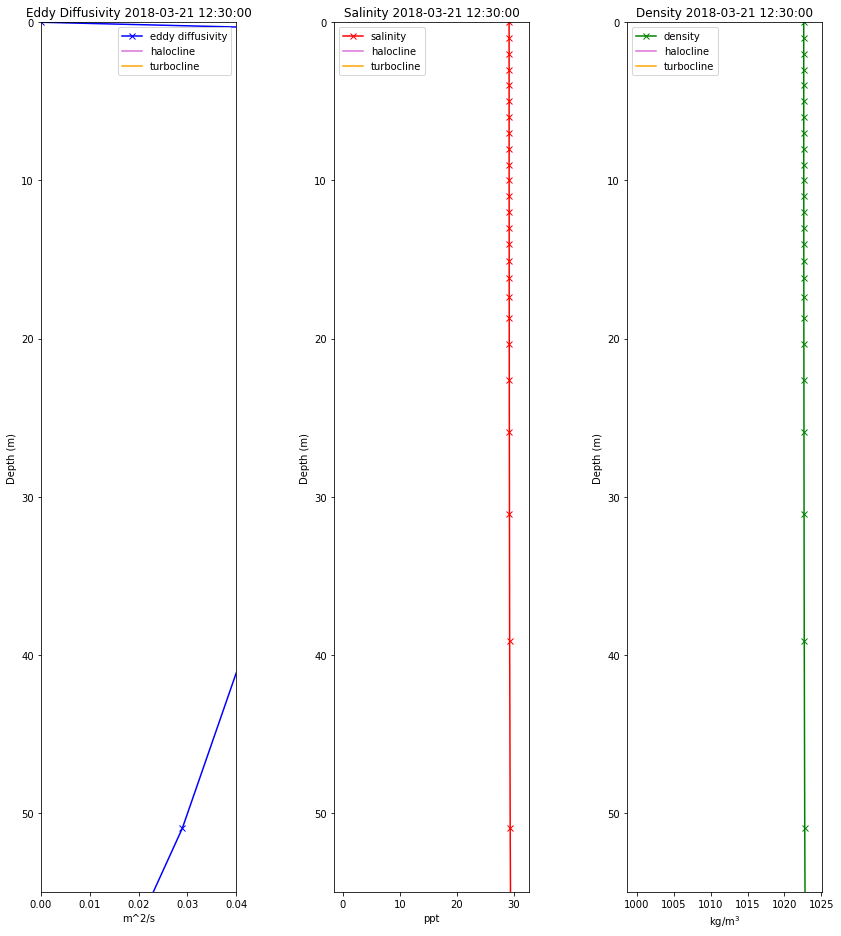

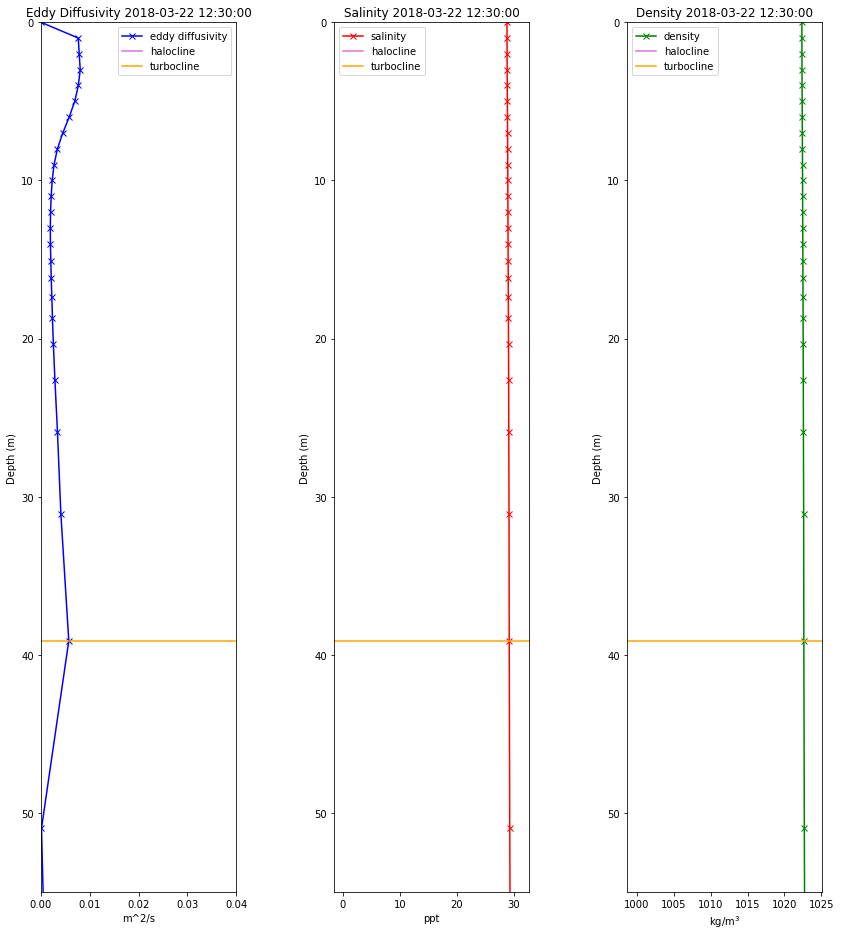

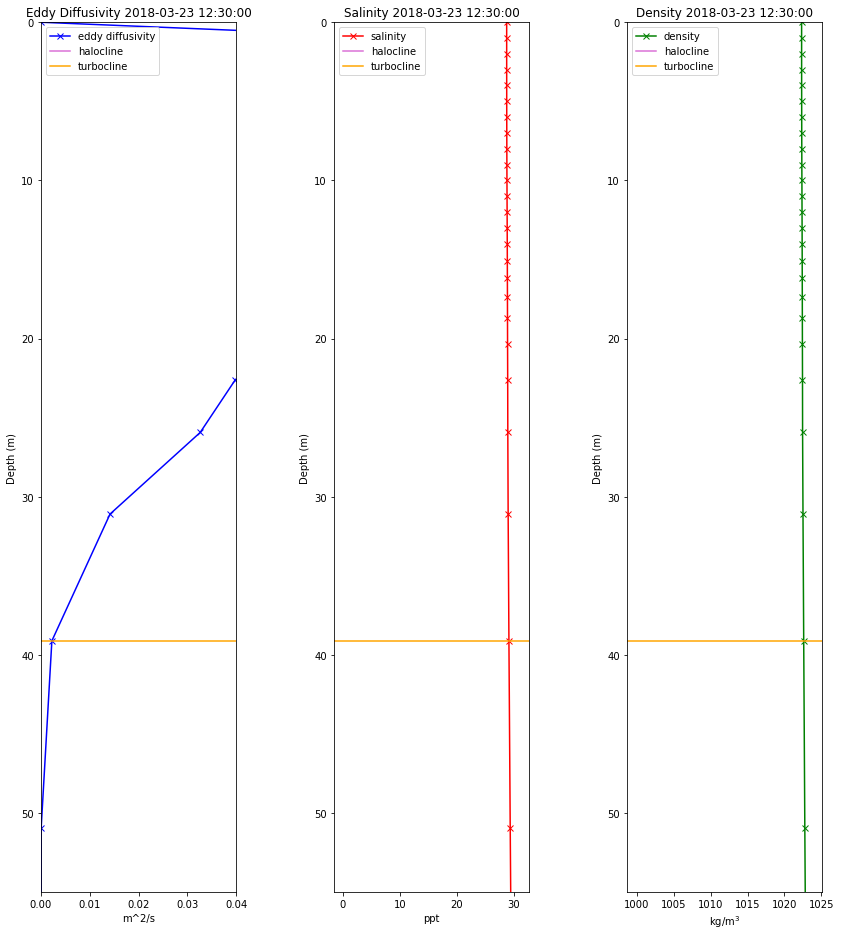

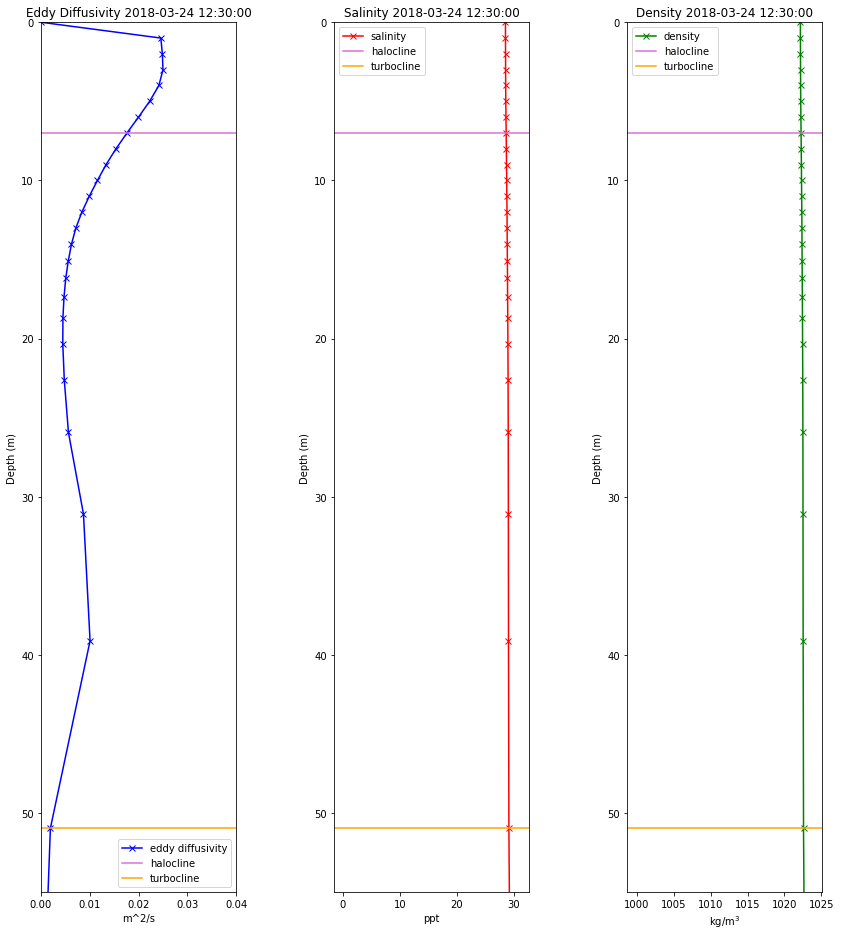

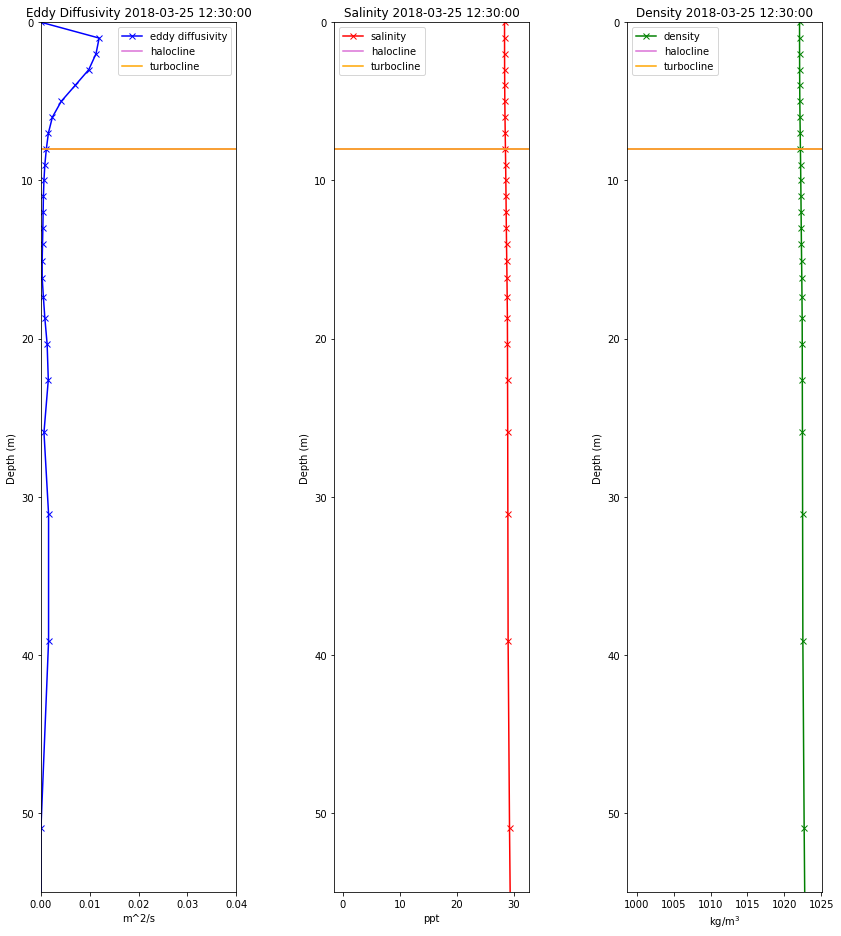

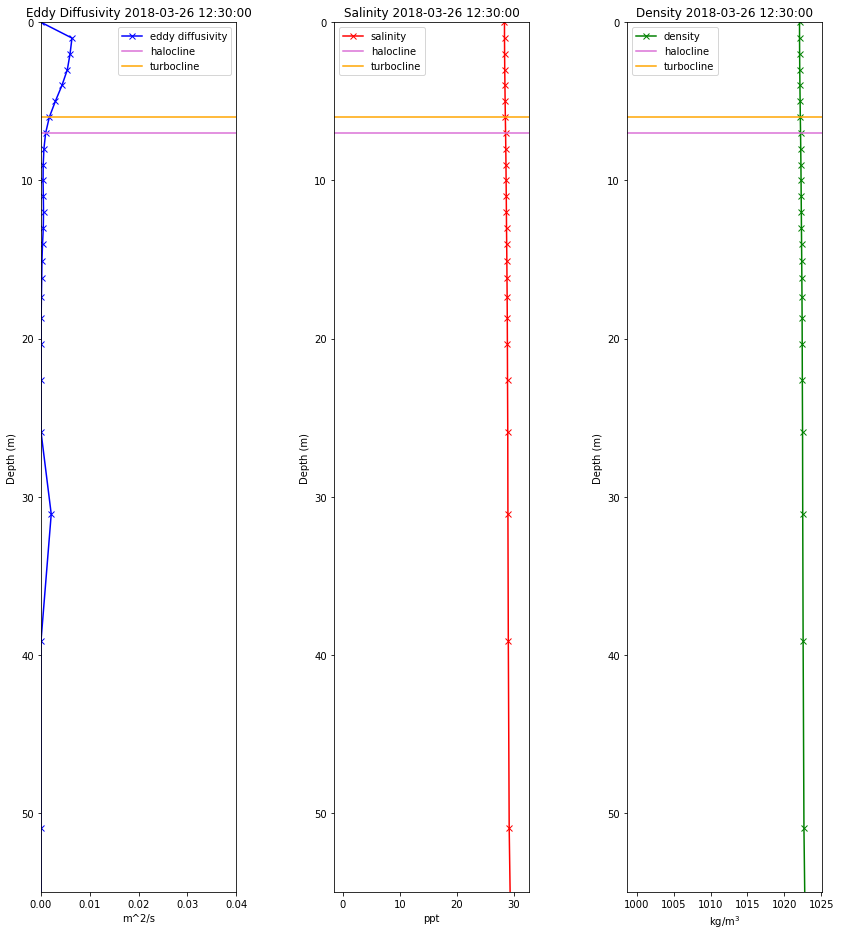

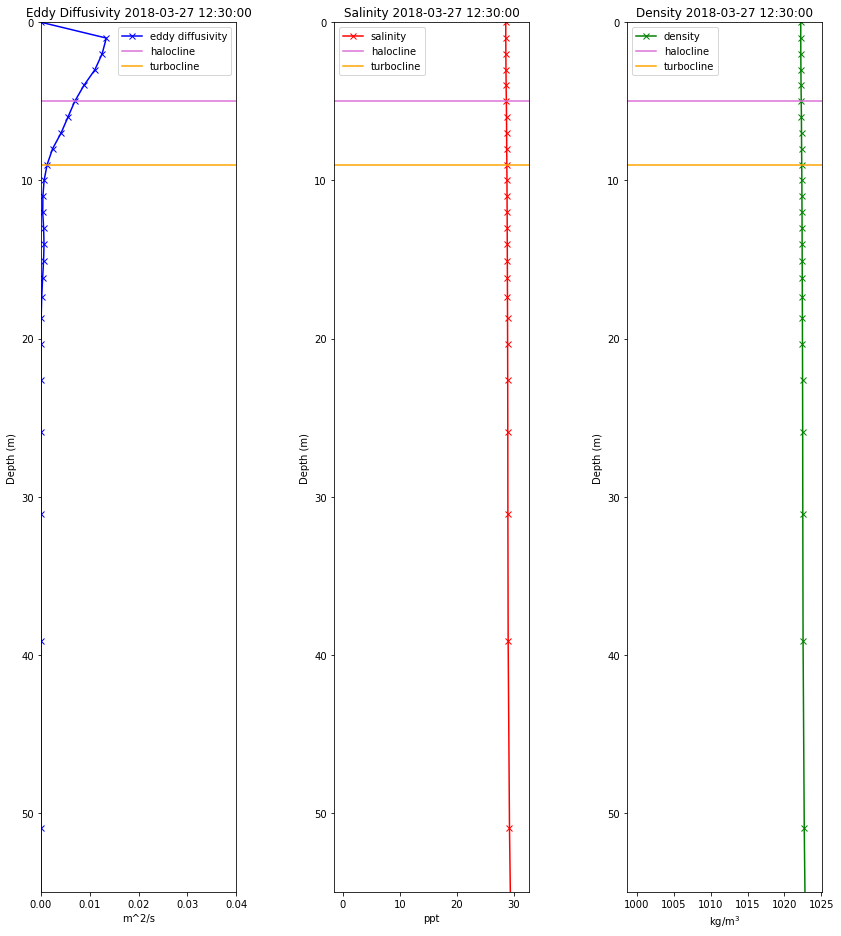

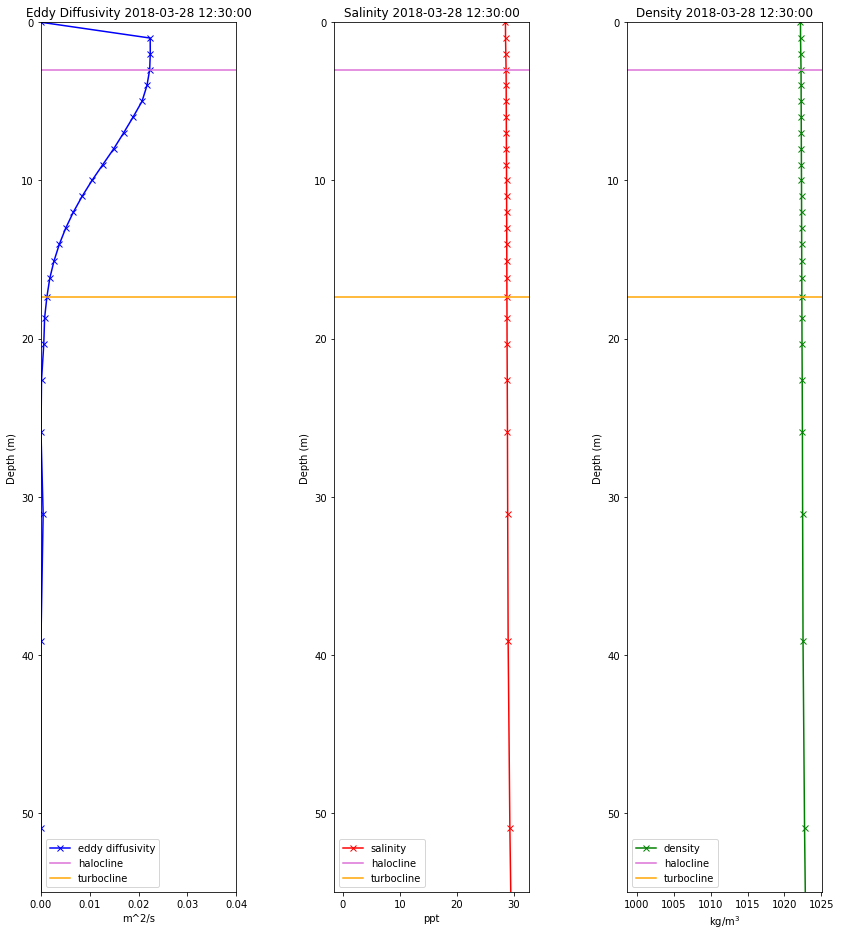

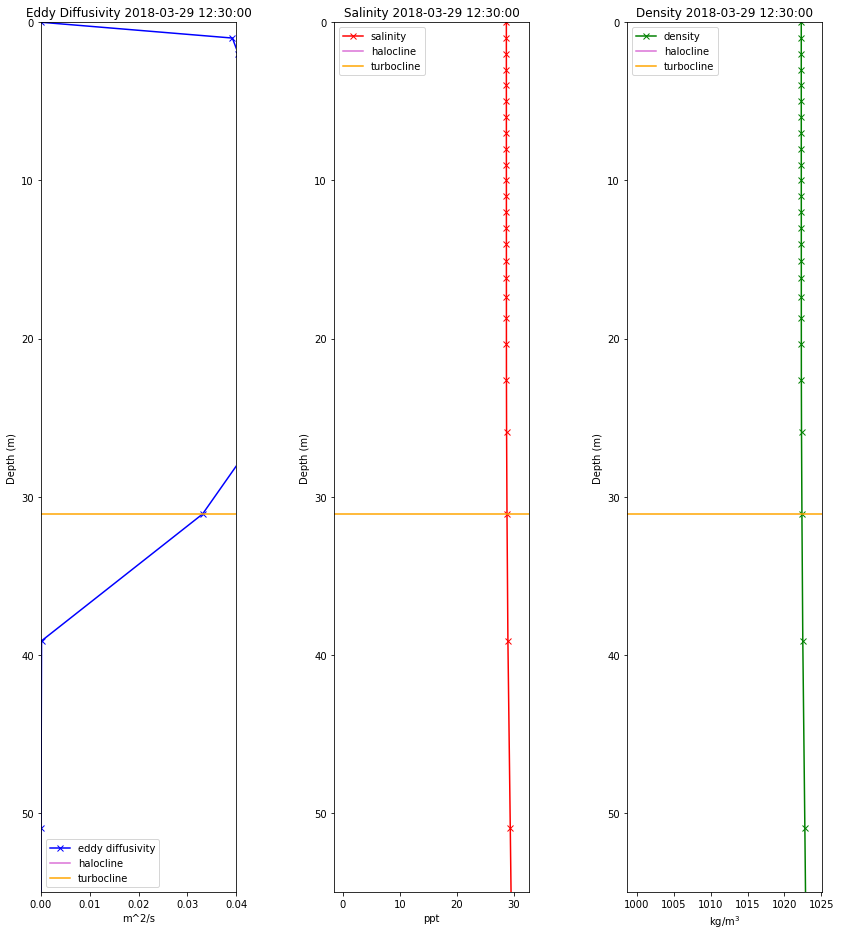

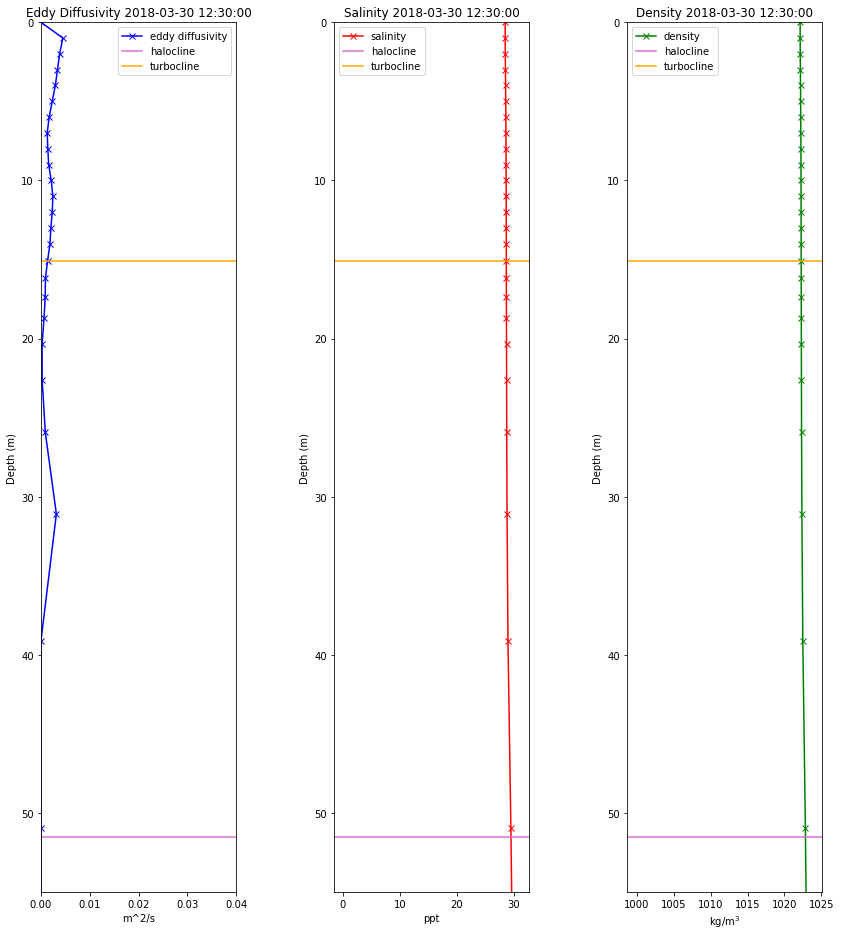

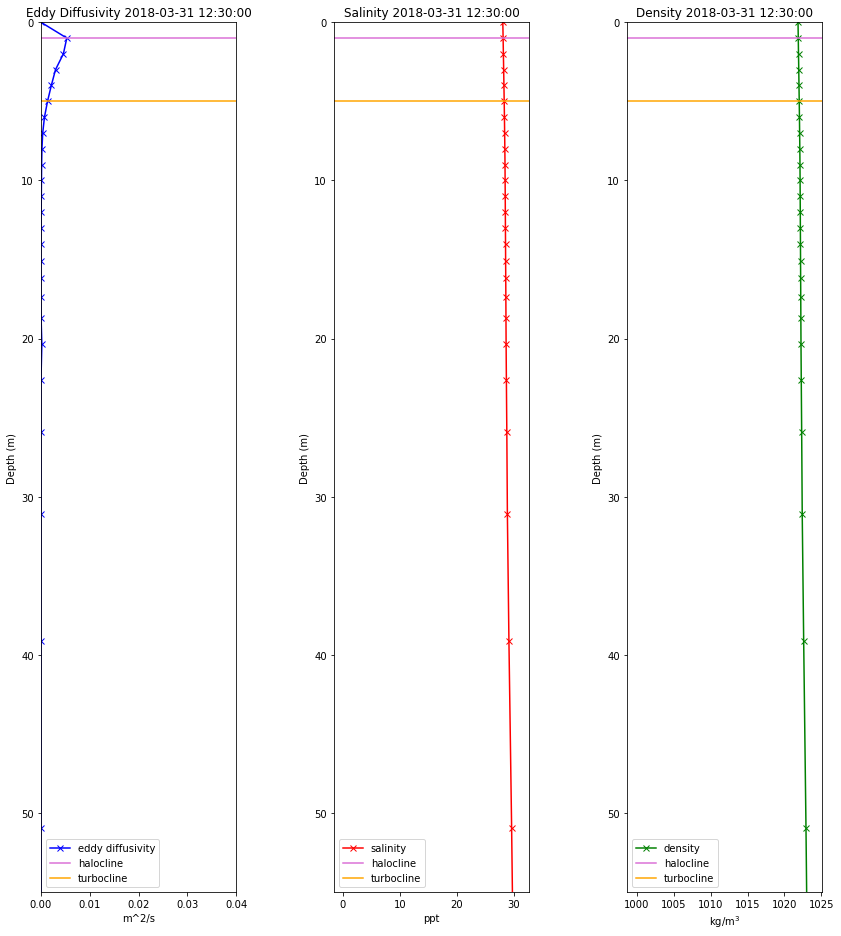

In [7]:
marchdays=grid_time[59:91]
p=0
for ind,time in enumerate(marchdays):
    dailyeddy=eddy[ind] 
    dailysal=salinity[ind]     
    dailytemp=temp[ind]  
    dailydensity=gsw.rho(dailysal,dailytemp,p)
    halo=halocline[ind]
    turbocline=turbo(dailyeddy,depth)
      
    fig,ax=plt.subplots(1,3,figsize=(14,16))  # creates a figure "ax" with 2 plots, with the same y axis
    fig.subplots_adjust(wspace=.5)
    ax[0].plot(dailyeddy,depth,'b-x',label='eddy diffusivity')
    ax[0].set_ylim(0,55)
    ax[0].set_xlim(0,0.04)
    ax[0].invert_yaxis()
    ax[0].set_xlabel('m^2/s')
    ax[0].set_title(f'Eddy Diffusivity {time}')
    ax[0].set_ylabel('Depth (m)')
    ax[0].axhline(y=halo, color='orchid', linestyle='-',label='halocline')
    ax[0].axhline(y=turbocline, color='orange', linestyle='-',label='turbocline')
    ax[0].legend()

    ax[1].plot(dailysal,depth,'r-x',label='salinity')
    ax[1].set_ylim(0,55)
    ax[1].invert_yaxis()
    ax[1].set_xlabel('ppt')
    ax[1].set_title(f'Salinity {time}')
    ax[1].set_ylabel('Depth (m)')
    ax[1].axhline(y=halo, color='orchid', linestyle='-',label='halocline')
    ax[1].axhline(y=turbocline, color='orange', linestyle='-',label='turbocline')
    ax[1].legend()

    ax[2].plot(dailydensity,depth,'g-x',label='density')
    ax[2].set_ylim(0,55)
    ax[2].invert_yaxis()
    ax[2].set_xlabel('kg/$\mathregular{m^3}$')
    ax[2].set_title(f'Density {time}')
    ax[2].set_ylabel('Depth (m)')
    ax[2].axhline(y=halo, color='orchid', linestyle='-',label='halocline')
    ax[2].axhline(y=turbocline, color='orange', linestyle='-',label='turbocline')
    ax[2].legend()